In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import re
import datetime
import scipy.stats

In [2]:
customer=pd.read_csv("C:\\Users\\iddya\\OneDrive\\Desktop\\Python\\Data\\Assignment\\Python Foundation End to End Case Study E-Commerce Analytics Project//CUSTOMERS.csv")

In [3]:
geo_location=pd.read_csv("C:\\Users\\iddya\\OneDrive\\Desktop\\Python\\Data\\Assignment\\Python Foundation End to End Case Study E-Commerce Analytics Project//GEO_LOCATION.csv")
order_item=pd.read_csv("C:\\Users\\iddya\\OneDrive\\Desktop\\Python\\Data\\Assignment\\Python Foundation End to End Case Study E-Commerce Analytics Project//ORDER_ITEMS.csv")
order_payment=pd.read_csv("C:\\Users\\iddya\\OneDrive\\Desktop\\Python\\Data\\Assignment\\Python Foundation End to End Case Study E-Commerce Analytics Project//ORDER_PAYMENTS.csv")
order_review=pd.read_csv("C:\\Users\\iddya\\OneDrive\\Desktop\\Python\\Data\\Assignment\\Python Foundation End to End Case Study E-Commerce Analytics Project//ORDER_REVIEW_RATINGS.csv")
order=pd.read_csv("C:\\Users\\iddya\\OneDrive\\Desktop\\Python\\Data\\Assignment\\Python Foundation End to End Case Study E-Commerce Analytics Project//ORDERS.csv")
product=pd.read_csv("C:\\Users\\iddya\\OneDrive\\Desktop\\Python\\Data\\Assignment\\Python Foundation End to End Case Study E-Commerce Analytics Project//PRODUCTS.csv")
seller=pd.read_csv("C:\\Users\\iddya\\OneDrive\\Desktop\\Python\\Data\\Assignment\\Python Foundation End to End Case Study E-Commerce Analytics Project//SELLERS.csv")


In [4]:
order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [5]:
order_review.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [6]:
temp1=pd.merge(left=order,right=order_review,left_on=order.order_id,right_on=order_review.order_id,how="inner")

In [7]:
temp1.drop(columns="key_0",inplace=True)

In [8]:
temp1=pd.merge(left=temp1,right=customer,left_on=temp1.customer_id,right_on=customer.customer_id,how="inner")

In [9]:
temp1.drop(columns="key_0",inplace=True)

In [10]:
temp1=pd.merge(left=temp1,right=order_payment,left_on=temp1.order_id_x,right_on=order_payment.order_id,how='inner')

In [11]:
temp1.drop(columns="key_0",inplace=True)

In [12]:
temp2=pd.merge(left=order_item,right=product,left_on=order_item.product_id,right_on=product.product_id,how="inner")

In [13]:
temp2.drop(columns="key_0",inplace=True)

In [14]:
temp2=pd.merge(left=temp2,right=seller,left_on=temp2.seller_id,right_on=seller.seller_id,how="inner")

In [15]:
temp2.drop(columns="key_0",inplace=True)

In [16]:
temp2=pd.merge(left=temp2,right=geo_location,left_on=temp2.seller_zip_code_prefix,right_on=geo_location.geolocation_zip_code_prefix,how='inner')

In [17]:
temp2.drop(columns="key_0",inplace=True)

In [18]:
data=pd.merge(left=temp1,right=temp2,left_on=temp1.order_id,right_on=temp2.order_id,how="inner")

C:\Users\iddya\AppData\Local\Temp\ipykernel_2172\2474614809.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'order_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  data=pd.merge(left=temp1,right=temp2,left_on=temp1.order_id,right_on=temp2.order_id,how="inner")


In [19]:
data.drop(columns="key_0",inplace=True)

In [20]:
data.columns=data.columns.str.replace("_x","")

In [21]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'order_id_y', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_id_y', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_id_y', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_id_y', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_id_y',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocati

In [22]:
data.shape

(118050, 48)

In [23]:
data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1250
order_delivered_customer_date    2584
order_estimated_delivery_date       0
review_id                           0
order_id_y                          0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
customer_id_y                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_id_y                          0
order_item_id                       0
product_id                          0
seller_id   

In [24]:
data.ndim

2

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118050 entries, 0 to 118049
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118050 non-null  object 
 1   customer_id                    118050 non-null  object 
 2   order_status                   118050 non-null  object 
 3   order_purchase_timestamp       118050 non-null  object 
 4   order_approved_at              118035 non-null  object 
 5   order_delivered_carrier_date   116800 non-null  object 
 6   order_delivered_customer_date  115466 non-null  object 
 7   order_estimated_delivery_date  118050 non-null  object 
 8   review_id                      118050 non-null  object 
 9   order_id_y                     118050 non-null  object 
 10  review_score                   118050 non-null  int64  
 11  review_creation_date           118050 non-null  object 
 12  review_answer_timestamp       

In [26]:
data.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
order_id_y                        object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
customer_id_y                     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
order_id_y                        object
order_item_id   

In [27]:
data.columns=data.columns.str.replace("_y","")

In [28]:
data_num= data.select_dtypes(include=["float","int"])
data_cat= data.select_dtypes(include="object")

In [29]:
data.shape

(118050, 48)

In [30]:
data_num.shape

(118050, 19)

In [31]:
data_cat.shape

(118050, 29)

In [32]:
# Percentage missing data

In [33]:
data_cat.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'order_id', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'customer_unique_id',
       'customer_city', 'customer_state', 'order_id', 'payment_type',
       'order_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'product_id', 'product_category_name', 'seller_id', 'seller_city',
       'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [34]:
data_num.head()

,review_score,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,4,3149,1,1,18.12,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,9350,-23.680114,-46.452454
1,4,3149,3,1,2.00,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,9350,-23.680114,-46.452454
2,4,3149,2,1,18.59,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,9350,-23.680114,-46.452454
3,4,47813,1,1,141.46,1,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,31570,-19.810119,-43.984727
4,5,75265,1,3,179.12,1,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,14840,-21.362358,-48.232976


In [35]:
data_num.isna().sum()*100/data.shape[0]

review_score                   0.000000
customer_zip_code_prefix       0.000000
payment_sequential             0.000000
payment_installments           0.000000
payment_value                  0.000000
order_item_id                  0.000000
price                          0.000000
freight_value                  0.000000
product_name_lenght            1.446845
product_description_lenght     1.446845
product_photos_qty             1.446845
product_weight_g               0.016942
product_length_cm              0.016942
product_height_cm              0.016942
product_width_cm               0.016942
seller_zip_code_prefix         0.000000
geolocation_zip_code_prefix    0.000000
geolocation_lat                0.000000
geolocation_lng                0.000000
dtype: float64

In [36]:
data_cat.isna().sum()*100/data.shape[0]

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.012706
order_delivered_carrier_date     1.058873
order_delivered_customer_date    2.188903
order_estimated_delivery_date    0.000000
review_id                        0.000000
order_id                         0.000000
review_creation_date             0.000000
review_answer_timestamp          0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
payment_type                     0.000000
order_id                         0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
product_id                       0.000000
product_category_name            1

In [37]:
data_cat.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,order_id,...,product_id,seller_id,shipping_limit_date,product_id,product_category_name,seller_id,seller_city,seller_state,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,Chhuikhadan,Chhattisgarh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,Chhuikhadan,Chhattisgarh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,Chhuikhadan,Chhattisgarh
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,595fac2a385ac33a80bd5114aec74eb8,Perfumery,289cdb325fb7e7f891c38608bf9e0962,Anantapur,Andhra Pradesh,Anantapur,Andhra Pradesh
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,...,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018 8:55,aa4383b373c6aca5d8797843e5594415,Auto,4869f7a5dfa277a7dca6462dcf3b52b2,Freelandgunj,Gujarat,Freelandgunj,Gujarat


In [38]:
def draw(x):
    
    sns.boxplot(x)
    plt.title(x.name)
    plt.show()
    

In [39]:
data_num.columns

Index(['review_score', 'customer_zip_code_prefix', 'payment_sequential',
       'payment_installments', 'payment_value', 'order_item_id', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [40]:
data_num.head()

,review_score,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,4,3149,1,1,18.12,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,9350,-23.680114,-46.452454
1,4,3149,3,1,2.00,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,9350,-23.680114,-46.452454
2,4,3149,2,1,18.59,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,9350,-23.680114,-46.452454
3,4,47813,1,1,141.46,1,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,31570,-19.810119,-43.984727
4,5,75265,1,3,179.12,1,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,14840,-21.362358,-48.232976


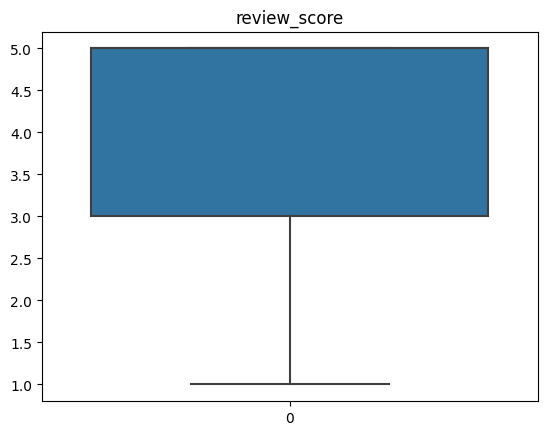

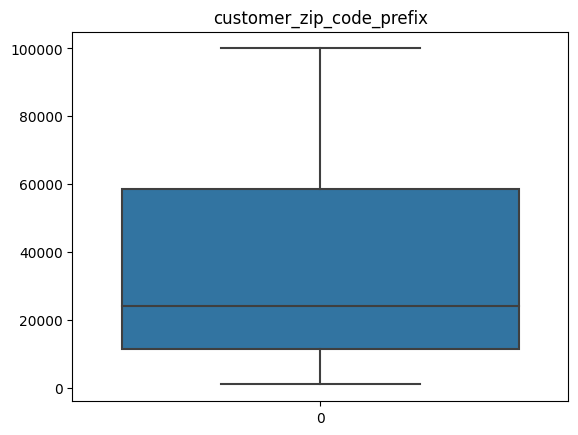

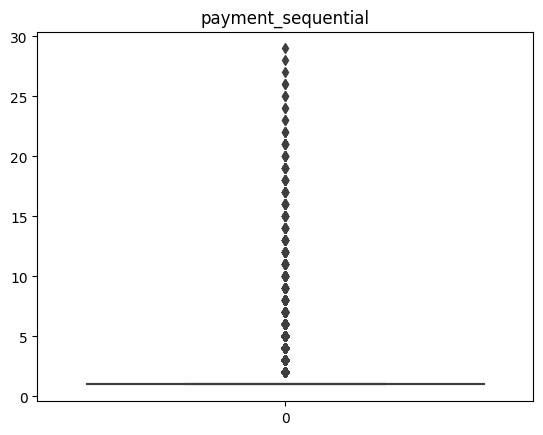

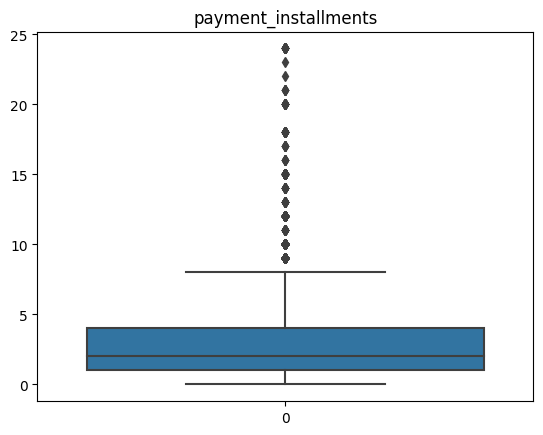

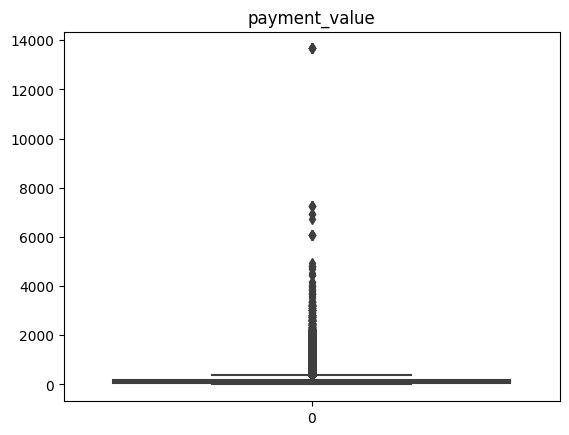

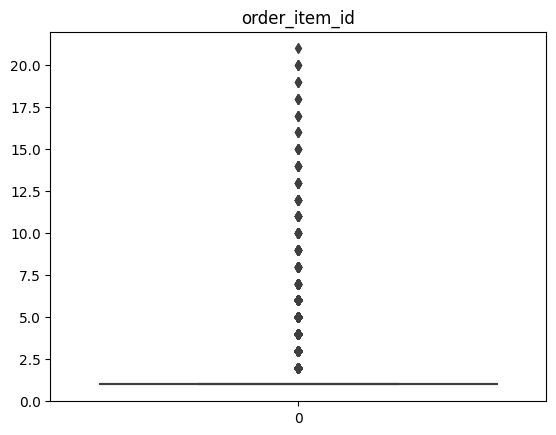

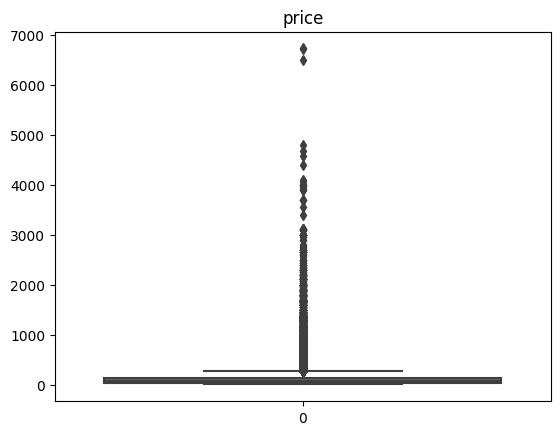

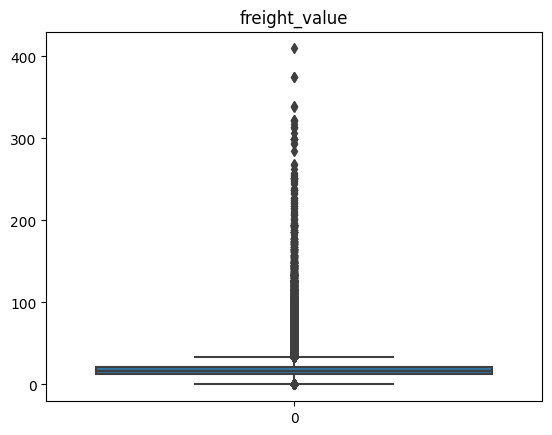

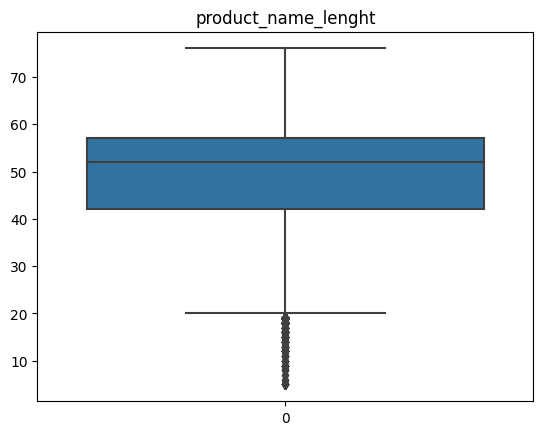

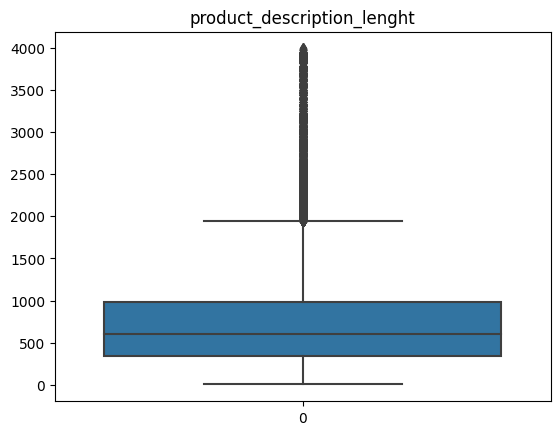

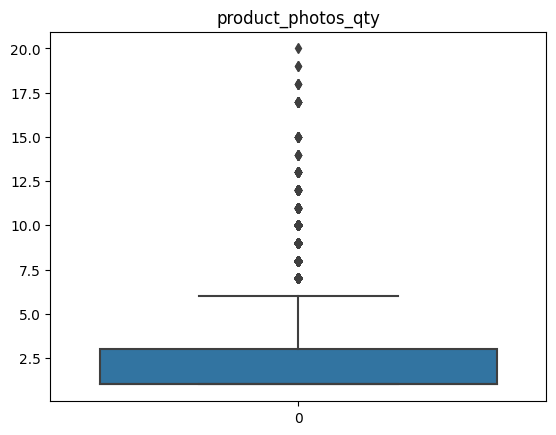

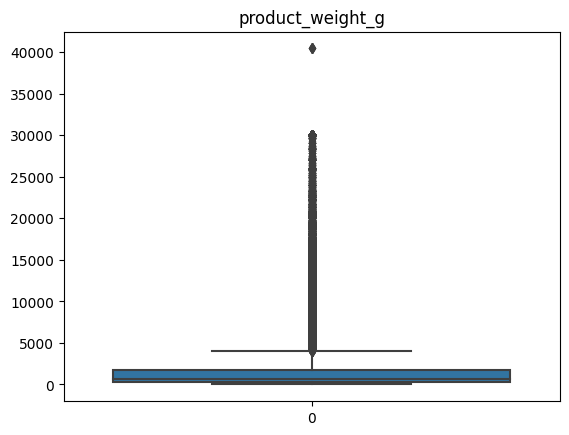

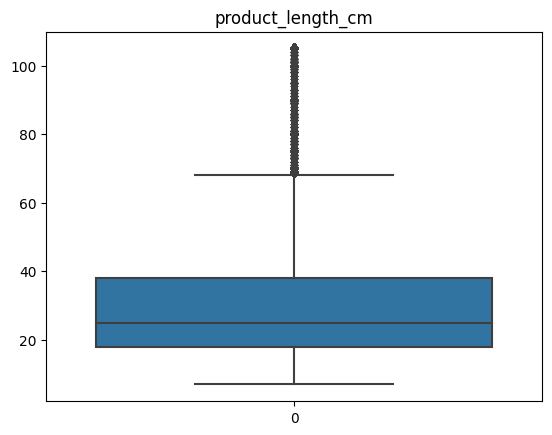

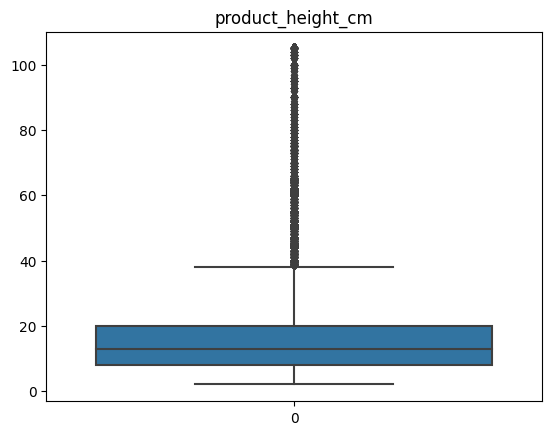

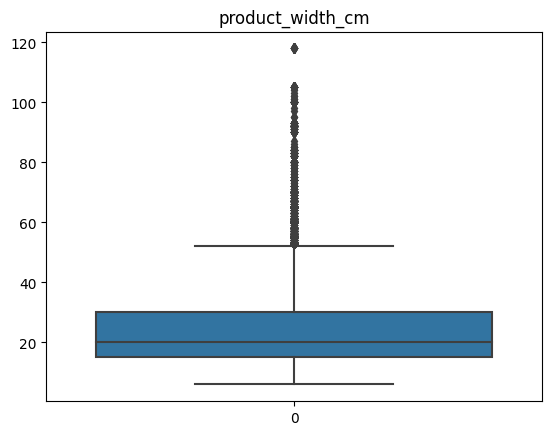

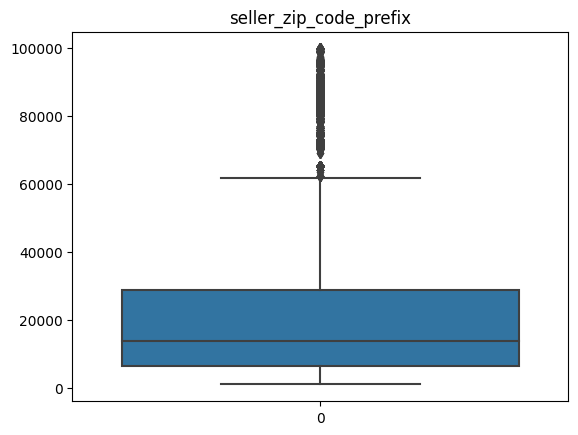

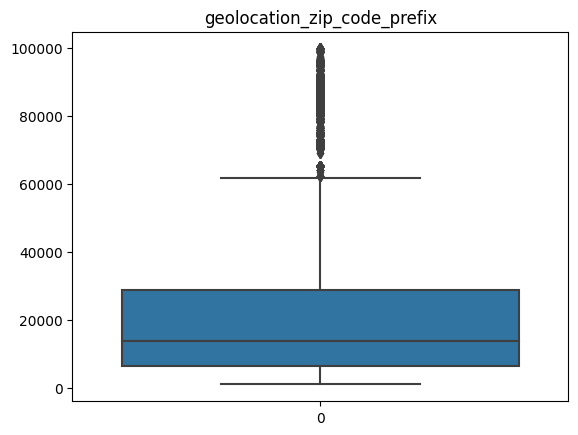

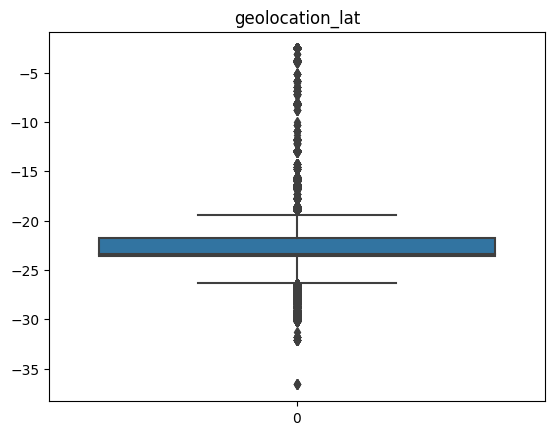

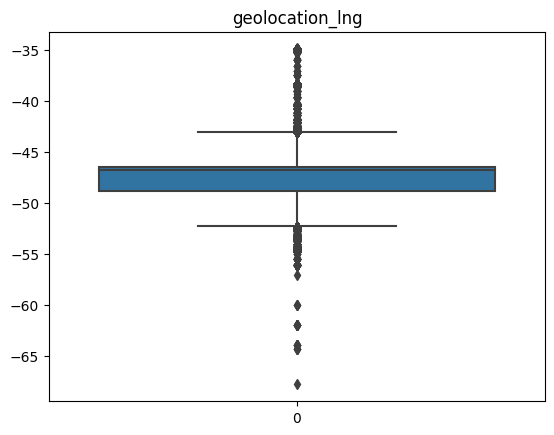

review_score                   None
customer_zip_code_prefix       None
payment_sequential             None
payment_installments           None
payment_value                  None
order_item_id                  None
price                          None
freight_value                  None
product_name_lenght            None
product_description_lenght     None
product_photos_qty             None
product_weight_g               None
product_length_cm              None
product_height_cm              None
product_width_cm               None
seller_zip_code_prefix         None
geolocation_zip_code_prefix    None
geolocation_lat                None
geolocation_lng                None
dtype: object

In [41]:
data_num.apply(draw)

In [42]:
#Outlier treatment

In [43]:
def outlier(x):
    q1=x.quantile(0.25)
    q3= x.quantile(0.75)
    iqr= q3-q1
    lo= q1-1.5*iqr
    hi= q3+ 1.5*iqr
    
    x.clip(lower=lo,upper=hi,inplace=True)
    return x
        
    

In [44]:
data_num.apply(outlier)

,review_score,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,4,3149,1,1.0,18.12,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,9350,-23.680114,-46.452454
1,4,3149,1,1.0,2.00,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,9350,-23.680114,-46.452454
2,4,3149,1,1.0,18.59,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,9350,-23.680114,-46.452454
3,4,47813,1,1.0,141.46,1,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,31570,-19.810119,-43.984727
4,5,75265,1,3.0,179.12,1,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,14840,-21.362358,-48.232976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118045,4,11722,1,3.0,195.00,1,174.90,20.10,52.0,828.0,4.0,4050.0,40.0,10.0,40.0,17602,17602,-21.935321,-50.497562
118046,5,45920,1,5.0,271.01,1,205.99,33.33,51.0,500.0,2.0,4050.0,32.0,38.0,22.0,8290,8290,-23.551013,-46.448489
118047,2,28685,1,4.0,382.13,1,179.99,33.33,59.0,1893.0,1.0,4050.0,20.0,20.0,20.0,37175,37175,-20.944706,-45.827098
118048,2,28685,1,4.0,382.13,1,179.99,33.33,59.0,1893.0,1.0,4050.0,20.0,20.0,20.0,37175,37175,-20.944706,-45.827098


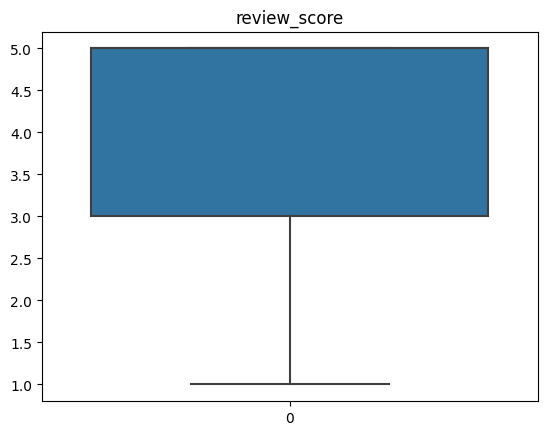

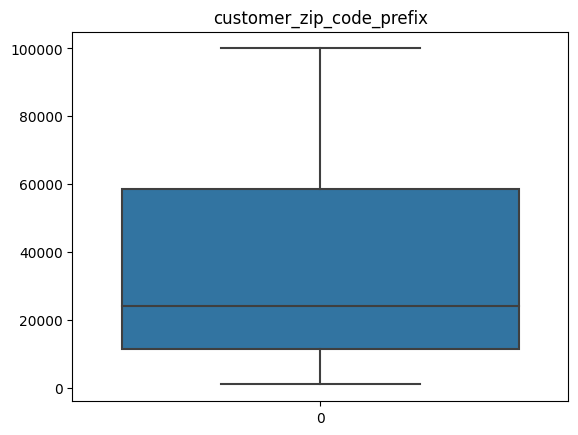

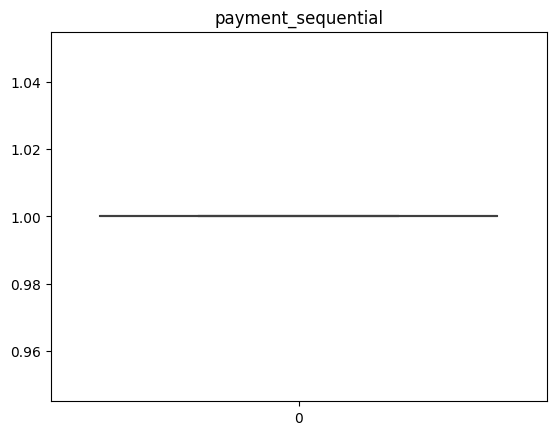

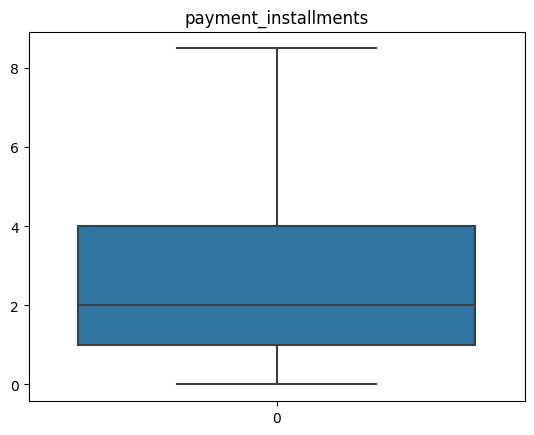

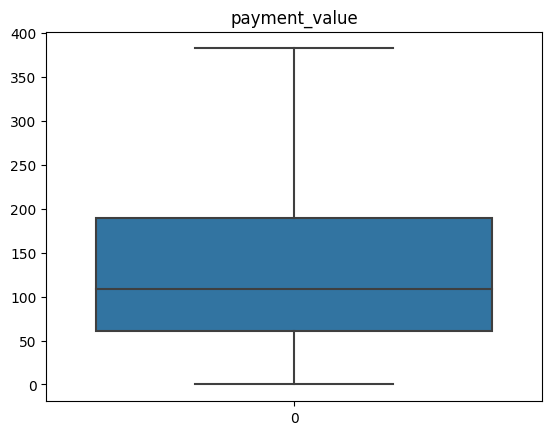

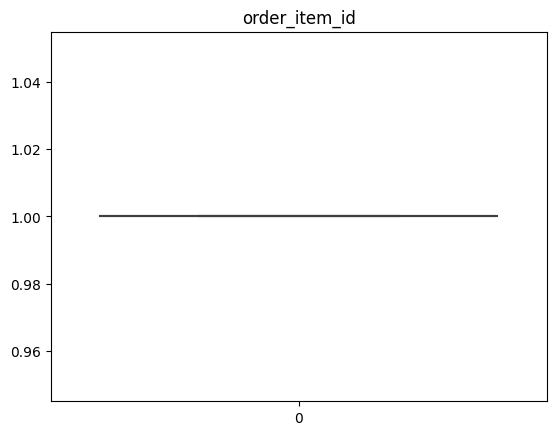

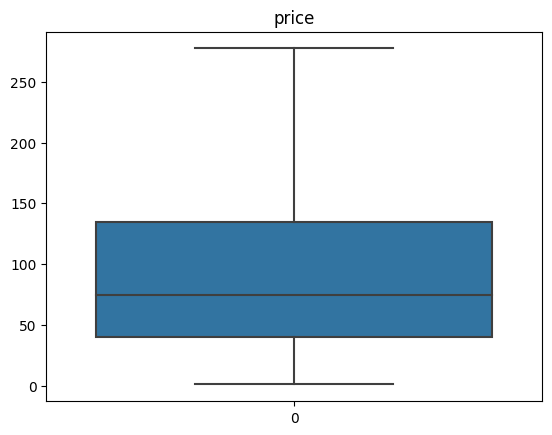

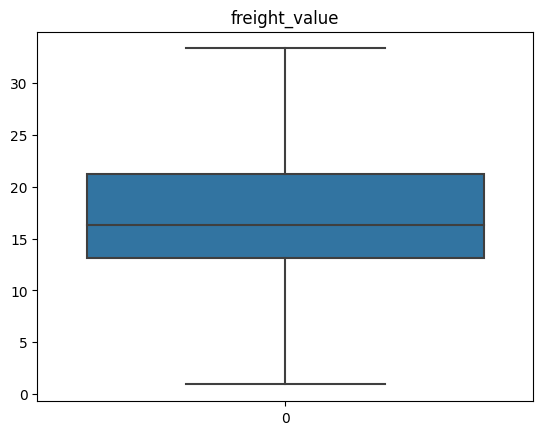

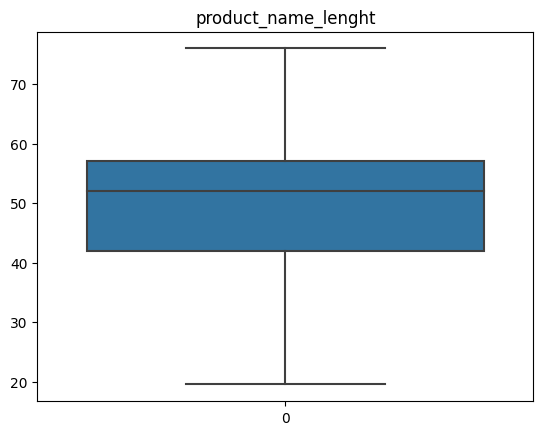

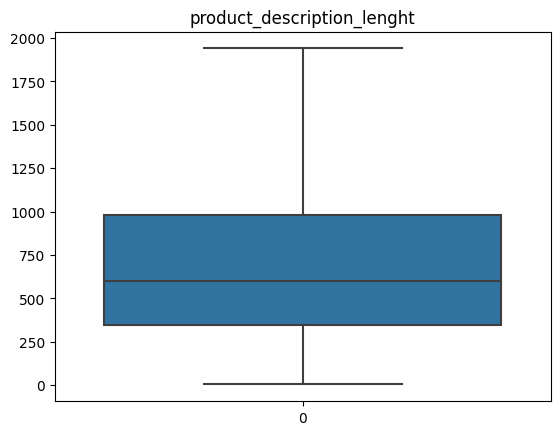

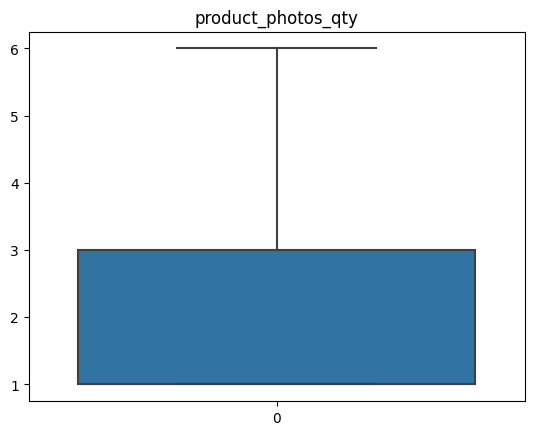

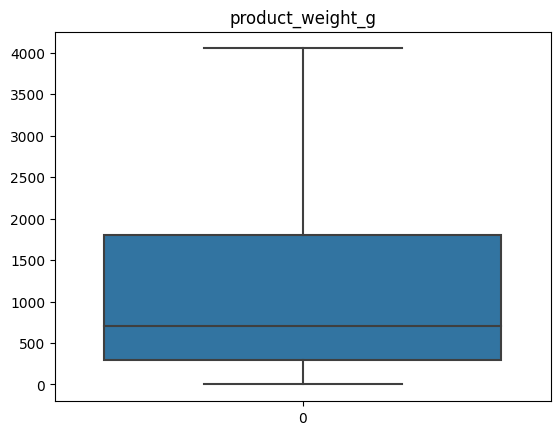

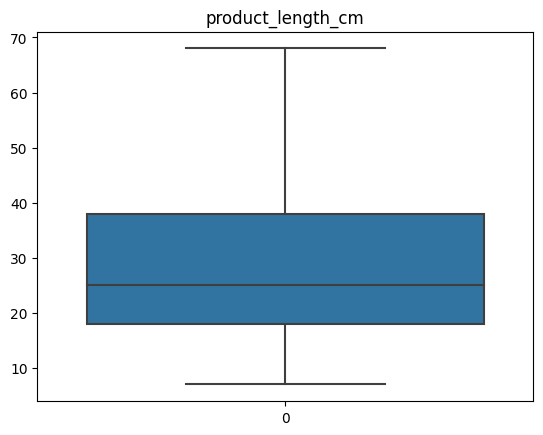

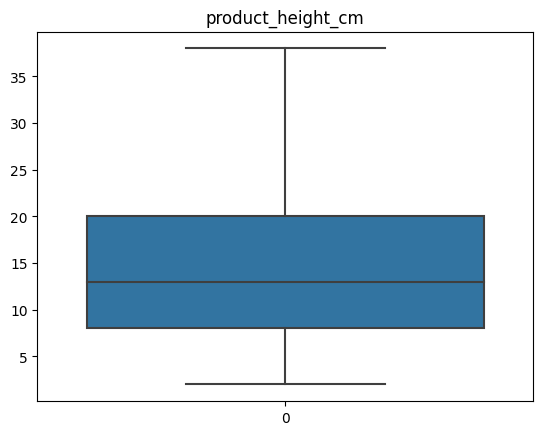

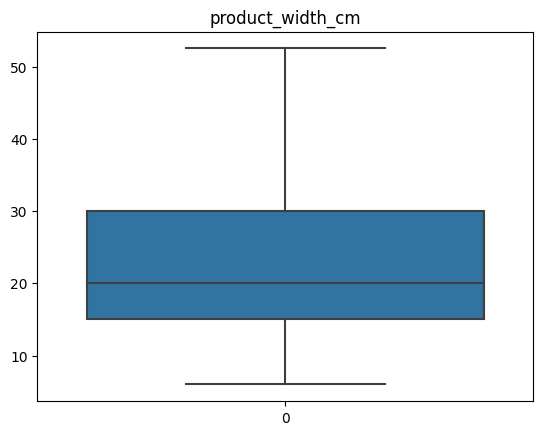

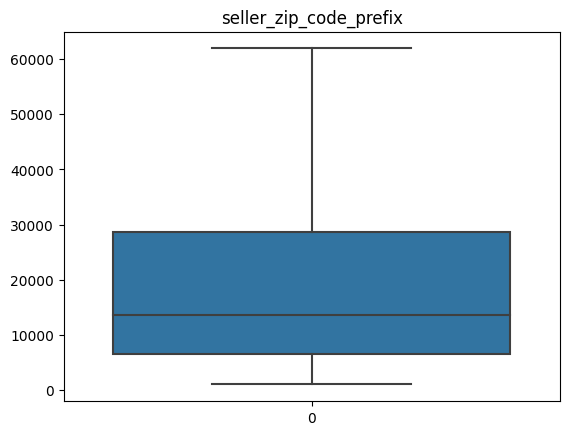

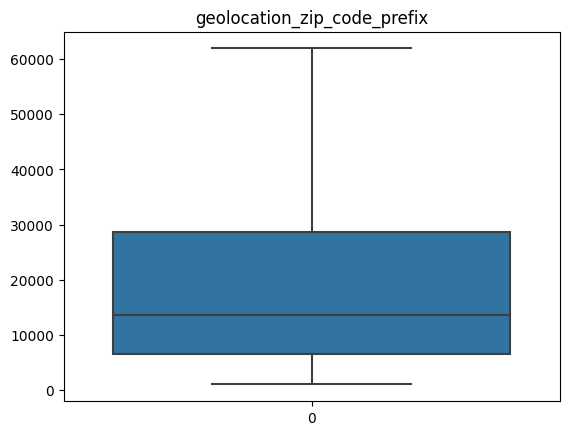

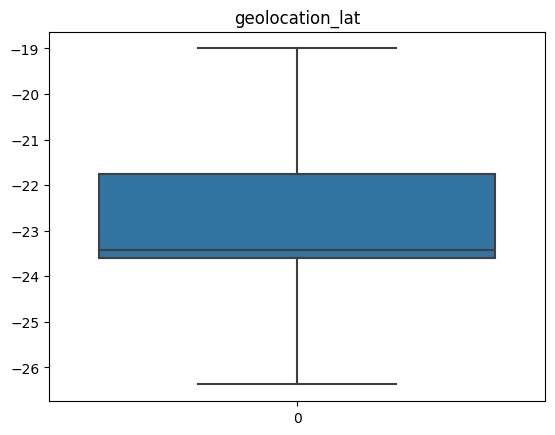

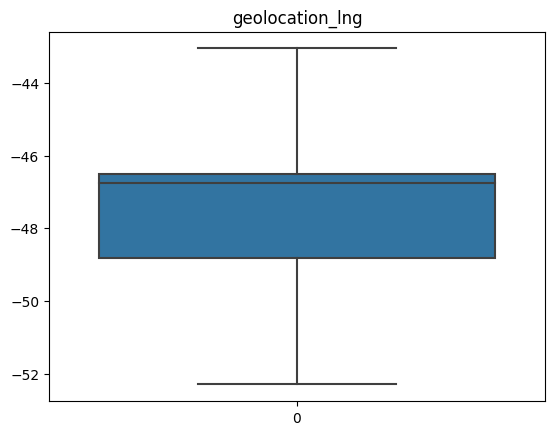

review_score                   None
customer_zip_code_prefix       None
payment_sequential             None
payment_installments           None
payment_value                  None
order_item_id                  None
price                          None
freight_value                  None
product_name_lenght            None
product_description_lenght     None
product_photos_qty             None
product_weight_g               None
product_length_cm              None
product_height_cm              None
product_width_cm               None
seller_zip_code_prefix         None
geolocation_zip_code_prefix    None
geolocation_lat                None
geolocation_lng                None
dtype: object

In [45]:
data_num.apply(draw)

In [46]:
data_cat.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1250
order_delivered_customer_date    2584
order_estimated_delivery_date       0
review_id                           0
order_id                            0
review_creation_date                0
review_answer_timestamp             0
customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
order_id                            0
payment_type                        0
order_id                            0
product_id                          0
seller_id                           0
shipping_limit_date                 0
product_id                          0
product_category_name            1733
seller_id                           0
seller_city                      1651
seller_state

In [47]:
#missing_value

In [48]:
data_num=data_num.apply(lambda x: x.fillna(x.mean()))

In [49]:
data_num.isna().sum()

review_score                   0
customer_zip_code_prefix       0
payment_sequential             0
payment_installments           0
payment_value                  0
order_item_id                  0
price                          0
freight_value                  0
product_name_lenght            0
product_description_lenght     0
product_photos_qty             0
product_weight_g               0
product_length_cm              0
product_height_cm              0
product_width_cm               0
seller_zip_code_prefix         0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
dtype: int64

In [50]:
data_cat=data_cat.apply(lambda x: x.fillna(x.mode()[0]))

In [51]:
data_cat.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
order_id                         0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
payment_type                     0
order_id                         0
product_id                       0
seller_id                        0
shipping_limit_date              0
product_id                       0
product_category_name            0
seller_id                        0
seller_city                      0
seller_state                     0
geolocation_city                 0
geolocation_state   

In [52]:
data_cat.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,order_id,...,product_id,seller_id,shipping_limit_date,product_id,product_category_name,seller_id,seller_city,seller_state,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,Chhuikhadan,Chhattisgarh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,Chhuikhadan,Chhattisgarh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,87285b34884572647811a353c7ac498a,Housewares,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,Chhuikhadan,Chhattisgarh
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,595fac2a385ac33a80bd5114aec74eb8,Perfumery,289cdb325fb7e7f891c38608bf9e0962,Anantapur,Andhra Pradesh,Anantapur,Andhra Pradesh


In [53]:
time_data= ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date","shipping_limit_date"]

In [54]:
for i in time_data:
    data_cat[i]=pd.to_datetime(data_cat[i],infer_datetime_format=True,dayfirst=True)

In [55]:
dummy_cat=data_cat.T

In [56]:
dummy_cat.drop_duplicates(inplace=True)

In [57]:
data_cat=dummy_cat.T

In [58]:
dummy_num=data_num.T

In [59]:
dummy_num.drop_duplicates(inplace=True)

In [60]:
data_num=dummy_num.T

In [61]:
data_num

,review_score,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,4.0,3149.0,1.0,1.0,18.12,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,-23.680114,-46.452454
1,4.0,3149.0,1.0,1.0,2.00,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,-23.680114,-46.452454
2,4.0,3149.0,1.0,1.0,18.59,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,-23.680114,-46.452454
3,4.0,47813.0,1.0,1.0,141.46,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,-19.810119,-43.984727
4,5.0,75265.0,1.0,3.0,179.12,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,-21.362358,-48.232976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118045,4.0,11722.0,1.0,3.0,195.00,174.90,20.10,52.0,828.0,4.0,4050.0,40.0,10.0,40.0,17602.0,-21.935321,-50.497562
118046,5.0,45920.0,1.0,5.0,271.01,205.99,33.33,51.0,500.0,2.0,4050.0,32.0,38.0,22.0,8290.0,-23.551013,-46.448489
118047,2.0,28685.0,1.0,4.0,382.13,179.99,33.33,59.0,1893.0,1.0,4050.0,20.0,20.0,20.0,37175.0,-20.944706,-45.827098
118048,2.0,28685.0,1.0,4.0,382.13,179.99,33.33,59.0,1893.0,1.0,4050.0,20.0,20.0,20.0,37175.0,-20.944706,-45.827098


In [62]:
data=pd.concat([data_cat,data_num],axis=1)

In [63]:
data.shape

(118050, 40)

In [64]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_creation_date', 'review_answer_timestamp',
       'customer_unique_id', 'customer_city', 'customer_state', 'payment_type',
       'product_id', 'seller_id', 'shipping_limit_date',
       'product_category_name', 'seller_city', 'seller_state',
       'geolocation_city', 'geolocation_state', 'review_score',
       'customer_zip_code_prefix', 'payment_sequential',
       'payment_installments', 'payment_value', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [65]:
data.drop_duplicates(ignore_index=True,inplace=True)

In [66]:
data.shape

(106781, 40)

In [67]:
high_level=["seller_city","seller_state","geolocation_city","geolocation_state","order_status","payment_type","product_category_name"]
a=[]
for i,j in enumerate(high_level):
    j = data[j].value_counts().reset_index()
    j.columns = ["values", "Frequency"]
    a.append(j)    

In [68]:
#Total_order_from_ each_city
a[0].head(4)

,values,Frequency
0,Akkarampalle,27710
1,Tarsali,7658
2,Bheemavaram,2903
3,Anakapalle,2893


In [69]:
#Total_order_from_ each_state
a[1].head(4)

,values,Frequency
0,Andhra Pradesh,73293
1,Gujarat,14021
2,Chhattisgarh,5078
3,Haryana,3104


In [70]:
#Total order from each geolocation_city
a[2]

,values,Frequency
0,Akkarampalle,30918
1,Tarsali,7658
2,Anakapalle,2893
3,Bheemavaram,2583
4,Anantapur,2540
...,...,...
524,Pantheeramkavu,1
525,Nuh,1
526,Osmanabad,1
527,Sarigam INA,1


In [71]:
#Total order from each  geolocation_state
a[3]

,values,Frequency
0,Andhra Pradesh,73918
1,Gujarat,13934
2,Chhattisgarh,4752
3,Haryana,3080
4,Karnataka,2254
5,Delhi,2248
6,Jammu & Kashmir,1083
7,Madhya Pradesh,1046
8,West Bengal,896
9,Rajasthan,749


In [72]:
#Total order status
a[4]

,values,Frequency
0,delivered,104437
1,shipped,1191
2,canceled,491
3,invoiced,335
4,processing,318
5,unavailable,7
6,approved,2


In [73]:
# Total payment_type
a[5]

,values,Frequency
0,credit_card,79507
1,UPI,20385
2,voucher,5299
3,debit_card,1590


In [74]:
# count of total ordered product_category_name
a[6]

,values,Frequency
0,Bed_Bath_Table,12433
1,Health_Beauty,9308
2,Sports_Leisure,8151
3,Computers_Accessories,7165
4,Furniture_Decor,7162
...,...,...
66,Arts_And_Craftmanship,24
67,La_Cuisine,15
68,Cds_Dvds_Musicals,12
69,Fashion_Childrens_Clothes,8


In [75]:
data_num.head(4)

,review_score,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,4.0,3149.0,1.0,1.0,18.12,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,-23.680114,-46.452454
1,4.0,3149.0,1.0,1.0,2.00,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,-23.680114,-46.452454
2,4.0,3149.0,1.0,1.0,18.59,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,-23.680114,-46.452454
3,4.0,47813.0,1.0,1.0,141.46,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,-19.810119,-43.984727


In [76]:
high_level=["review_score","customer_zip_code_prefix","payment_installments"]
a=[]
for i,j in enumerate(high_level):
    j = data[j].value_counts().reset_index()
    j.columns = ["values", "Frequency"]
    a.append(j)    

In [77]:
#Review score total unique count
a[0]

,values,Frequency
0,5.0,60966
1,4.0,20385
2,1.0,12855
3,3.0,8945
4,2.0,3630


In [78]:
#customer_zip_code_prefix total count
a[1]


,values,Frequency
0,22790.0,144
1,24220.0,139
2,24230.0,131
3,22793.0,125
4,22775.0,116
...,...,...
14962,36620.0,1
14963,72509.0,1
14964,65180.0,1
14965,44910.0,1


In [79]:
# payment_installments counts
a[2]

,values,Frequency
0,1.0,53151
1,2.0,12733
2,3.0,10823
3,4.0,7377
4,8.5,6840
5,5.0,5463
6,8.0,4564
7,6.0,4131
8,7.0,1697
9,0.0,2


In [80]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_creation_date', 'review_answer_timestamp',
       'customer_unique_id', 'customer_city', 'customer_state', 'payment_type',
       'product_id', 'seller_id', 'shipping_limit_date',
       'product_category_name', 'seller_city', 'seller_state',
       'geolocation_city', 'geolocation_state', 'review_score',
       'customer_zip_code_prefix', 'payment_sequential',
       'payment_installments', 'payment_value', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [81]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,106771,106772,106773,106774,106775,106776,106777,106778,106779,106780
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159,a4591c265e18cb1dcee52889e2d8acc3,136cce7faa42fdb2cefd53fdc79a6098,6514b8ad8028c9f2cc2374ded245783f,...,9115830be804184b91f5c00f6f49f92d,9115830be804184b91f5c00f6f49f92d,aa04ef5214580b06b10e2a378300db44,aa04ef5214580b06b10e2a378300db44,880675dff2150932f1601e1c07eadeeb,9c5dedf39a927c1b2549525ed64a053c,63943bddc261676b46f01ca7ac2f7bd8,83c1379a015df1e13d02aae0204711ab,11c177c8e97725db2631073c19f07b62,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089,f88197465ea7920adcdbec7375364d82,8ab97904e6daea8866dbdbc4fb7aad2c,503740e9ca751ccdda7ba28e9ab8f608,ed0271e0b7da060a393796590e7b737a,9bdf08b4b3b52b5526ff42d37d47f222,...,da2124f134f5dfbce9d06f29bdb6c308,da2124f134f5dfbce9d06f29bdb6c308,f01a6bfcc730456317e4081fe0c9940e,f01a6bfcc730456317e4081fe0c9940e,47cd45a6ac7b9fb16537df2ccffeb5ac,39bd1228ee8140590ac3aca26f2dfe00,1fca14ff2861355f6e5f14306ff977a7,1aa71eb042121263aafbe80c1b562c9c,b331b74b18dc79bcdf6532d51e1637c1,edb027a75a1449115f6b43211ae02a24
order_status,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,invoiced,delivered,...,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-02-10 10:56:00,2017-02-10 10:56:00,2017-02-10 10:56:00,2018-07-24 20:41:00,2018-08-08 08:38:00,2017-11-18 19:28:00,2018-02-13 21:18:00,2017-09-07 21:57:00,2017-11-04 12:22:00,2017-05-16 13:10:00,...,2017-04-10 19:57:00,2017-04-10 19:57:00,2017-01-27 00:30:00,2017-01-27 00:30:00,2017-02-23 09:05:00,2017-09-03 09:54:00,2018-06-02 12:58:00,2017-08-27 14:46:00,2018-08-01 21:28:00,2018-08-03 20:57:00
order_approved_at,2017-02-10 11:07:00,2017-02-10 11:07:00,2017-02-10 11:07:00,2018-07-26 03:24:00,2018-08-08 08:55:00,2017-11-18 19:45:00,2018-02-13 22:20:00,2017-09-07 22:10:00,2017-04-13 13:25:00,2017-05-16 13:22:00,...,2017-04-10 20:07:00,2017-04-10 20:07:00,2017-01-27 01:05:00,2017-01-27 01:05:00,2017-02-23 09:15:00,2017-09-03 09:54:00,2018-06-02 13:10:00,2017-08-27 15:04:00,2018-08-01 21:36:00,2018-09-03 11:20:00
order_delivered_carrier_date,2017-04-10 19:55:00,2017-04-10 19:55:00,2017-04-10 19:55:00,2018-07-26 14:31:00,2018-08-08 13:50:00,2017-11-22 13:39:00,2018-02-14 19:46:00,2017-11-07 14:58:00,2017-10-08 11:58:00,2017-05-22 10:07:00,...,2017-05-10 16:52:00,2017-05-10 16:52:00,2017-01-30 11:40:00,2017-01-30 11:40:00,2017-01-03 10:22:00,2017-10-03 11:18:00,2018-07-02 23:22:00,2017-08-28 20:52:00,2018-12-01 15:35:00,2018-09-03 22:11:00
order_delivered_customer_date,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2018-07-08 15:27:00,2018-08-17 18:06:00,2017-02-12 00:28:00,2018-02-16 18:17:00,2017-07-26 10:57:00,2017-08-14 12:46:00,2017-05-26 12:55:00,...,2017-10-20 20:25:00,2017-10-20 20:25:00,2017-07-02 13:15:00,2017-07-02 13:15:00,2017-06-03 11:08:00,2017-03-17 15:08:00,2018-02-28 17:37:00,2017-09-21 11:24:00,2018-01-25 23:32:00,2018-03-16 13:08:00
order_estimated_delivery_date,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2018-08-13 00:00:00,2018-09-04 00:00:00,2017-12-15 00:00:00,2018-02-26 00:00:00,2017-08-01 00:00:00,2017-05-09 00:00:00,2017-06-07 00:00:00,...,2017-11-07 00:00:00,2017-11-07 00:00:00,2017-03-17 00:00:00,2017-03-17 00:00:00,2017-03-22 00:00:00,2017-03-28 00:00:00,2018-03-02 00:00:00,2017-09-27 00:00:00,2018-02-15 00:00:00,2018-04-03 00:00:00
review_id,a54f0611adc9ed256b57ede6b6eb5114,a54f0611adc9ed256b57ede6b6eb5114,a54f0611adc9ed256b57ede6b6eb5114,8d5266042046a06655c8db133d120ba5,e73b67b67587f7644d5bd1a52deb1b01,359d03e676b3c

In [82]:
#Total revenue

In [83]:
data.payment_value.sum()

14294593.569999998

In [84]:
# Revenue per customer

In [85]:
data.groupby(["customer_id"])[["payment_value"]].agg(np.sum)

,payment_value
customer_id,
00012a2ce6f8dcda20d059ce98491703,114.74
000161a058600d5901f007fab4c27140,67.41
0001fd6190edaaf884bcaf3d49edf079,195.42
0002414f95344307404f0ace7a26f1d5,179.35
000379cdec625522490c315e70c7a9fb,107.01
...,...
fffcb937e9dd47a13f05ecb8290f4d3e,91.91
fffecc9f79fd8c764f843e9951b11341,81.36
fffeda5b6d849fbd39689bb92087f431,63.13


In [86]:
# Total quantity sold 

In [87]:
data.groupby(["customer_id"])[["product_photos_qty"]].agg(np.sum)

,product_photos_qty
customer_id,
00012a2ce6f8dcda20d059ce98491703,1.0
000161a058600d5901f007fab4c27140,2.0
0001fd6190edaaf884bcaf3d49edf079,2.0
0002414f95344307404f0ace7a26f1d5,1.0
000379cdec625522490c315e70c7a9fb,2.0
...,...
fffcb937e9dd47a13f05ecb8290f4d3e,1.0
fffecc9f79fd8c764f843e9951b11341,9.0
fffeda5b6d849fbd39689bb92087f431,4.0


In [88]:
data.product_photos_qty

0         4.0
1         4.0
2         4.0
3         1.0
4         1.0
         ... 
106776    1.0
106777    4.0
106778    2.0
106779    1.0
106780    1.0
Name: product_photos_qty, Length: 106781, dtype: float64

In [89]:
#Total weight goods sold
data.product_weight_g.sum()

139324692.36687285

In [90]:
# Total product sold 

In [91]:
data.groupby(["product_category_name"])[['product_photos_qty']].agg(np.sum)

,product_photos_qty
product_category_name,
Agro_Industry_And_Commerce,466.0
Air_Conditioning,616.0
Art,374.0
Arts_And_Craftmanship,84.0
Audio,667.0
...,...
Stationery,6798.0
Tablets_Printing_Image,145.0
Telephony,12641.0


In [92]:
data.product_category_name.value_counts()

Bed_Bath_Table               12433
Health_Beauty                 9308
Sports_Leisure                8151
Computers_Accessories         7165
Furniture_Decor               7162
                             ...  
Arts_And_Craftmanship           24
La_Cuisine                      15
Cds_Dvds_Musicals               12
Fashion_Childrens_Clothes        8
Security_And_Services            2
Name: product_category_name, Length: 71, dtype: int64

In [93]:
data.product_category_name.value_counts().sum()

106781

In [94]:
# Total unique seller
data.seller_id.nunique()

3088

In [95]:
#Total customer
data.customer_unique_id.nunique()

95216

In [96]:
#Unique state /Total state presence 
data.geolocation_state.nunique()

19

In [97]:
data.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_creation_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-02-10 10:56:00,2017-02-10 11:07:00,2017-04-10 19:55:00,2017-10-10 21:25:00,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,10/11/2017 0:00,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,-23.680114,-46.452454


In [98]:
#Unique review received
data.review_id.nunique()

98237

In [99]:
#Total customer city coverage
data.customer_city.nunique()

4105

In [100]:
# Total payment type option available 
data.payment_type.nunique()

4

In [101]:
#Total unique products
data.product_id.nunique()

32889

In [102]:
#b. Understanding how many new customers acquired every month

In [103]:
data_temp=data[["customer_unique_id","order_purchase_timestamp"]]

In [104]:
data_temp = data_temp.assign(M=data_temp.order_purchase_timestamp.dt.month)
data_temp = data_temp.assign(Y=data_temp.order_purchase_timestamp.dt.year)

data_temp = data_temp.assign(MY=data_temp.M.astype(str)+ "-" + data_temp.Y.astype(str) )

In [105]:
data_temp.drop_duplicates(subset="customer_unique_id",keep="first",inplace=True)

In [106]:
data_temp.groupby(["MY"])["customer_unique_id"].agg("count")

MY
1-2017     1994
1-2018     5995
10-2016      36
10-2017    4019
10-2018    1655
11-2017    6877
11-2018    1728
12-2016       1
12-2017    4038
12-2018    1660
2-2016        1
2-2017     2088
2-2018     5745
3-2016        7
3-2017     2923
3-2018     6036
4-2016       60
4-2017     2793
4-2018     5911
5-2016       42
5-2017     3582
5-2018     5261
6-2016       48
6-2017     3173
6-2018     5383
7-2016       44
7-2017     3712
7-2018     6132
8-2016       38
8-2017     3822
8-2018     4818
9-2016       25
9-2017     3757
9-2018     1812
Name: customer_unique_id, dtype: int64

In [107]:
#Understand the retention of customers on month on month basis

In [108]:
df = data[['customer_unique_id', 'order_purchase_timestamp']]
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
retention = df.pivot_table(index='customer_unique_id', columns='order_month', values='order_purchase_timestamp', aggfunc='count')
retained_customers = retention[retention.sum(axis=1) >= 2]
retained_customers.sum(axis=0)


C:\Users\iddya\AppData\Local\Temp\ipykernel_2172\454618593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')


order_month
2016-02       0.0
2016-03       1.0
2016-04      20.0
2016-05      14.0
2016-06       8.0
2016-07       3.0
2016-08      11.0
2016-09      12.0
2016-10       9.0
2016-12       1.0
2017-01     561.0
2017-02     456.0
2017-03     634.0
2017-04     620.0
2017-05     984.0
2017-06     714.0
2017-07     994.0
2017-08     937.0
2017-09     848.0
2017-10     988.0
2017-11    1563.0
2017-12     790.0
2018-01    1281.0
2018-02    1120.0
2018-03    1176.0
2018-04    1188.0
2018-05    1023.0
2018-06    1009.0
2018-07    1069.0
2018-08     787.0
2018-09     315.0
2018-10     253.0
2018-11     285.0
2018-12     331.0
Freq: M, dtype: float64

In [109]:
#d. How the revenues from existing/new customers on month on month basis

In [110]:
old_cust=list(retained_customers.index)

In [111]:
# Net revenue from retained customer
data.loc[data.customer_unique_id.isin(old_cust),"payment_value"].sum()

2637280.29

In [112]:
#Net revenue from new customer

In [113]:
rev_cust = data_temp.pivot_table(columns="customer_unique_id")

C:\Users\iddya\AppData\Local\Temp\ipykernel_2172\2456171554.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  rev_cust = data_temp.pivot_table(columns="customer_unique_id")


In [114]:
rev_cust.drop(columns=old_cust,inplace=True)

In [115]:
new_cust= list(rev_cust.columns)

In [116]:
# Net revenue from new customer
data.loc[data.customer_unique_id.isin(new_cust),"payment_value"].sum()

11657313.280000001

In [117]:
#e. Understand the trends/seasonality of sales, quantity by category, location, month,
#week, day, time, channel, payment method etc…

In [118]:
#Location trend-Monthly

In [119]:
data.sort_values(by="order_purchase_timestamp",ascending=True,inplace=True)
data['month_year'] =data['order_purchase_timestamp'].dt.to_period('M')

In [120]:
data.pivot_table(columns="month_year", values="product_photos_qty", index="customer_state", aggfunc=np.sum)

month_year,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-12,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
customer_state,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,1.0,7.0,98.000000,68.0,76.0,92.0,70.142709,45.0,57.0,1.0,...,9016.706263,9098.853131,8123.138548,7750.138548,9036.280217,7350.425006,2680.283337,2481.712503,2560.426046,2310.140628
Arunachal Pradesh,NaN,NaN,1.000000,2.0,NaN,1.0,2.000000,4.0,NaN,NaN,...,148.000000,166.285417,186.000000,117.285417,178.142709,148.000000,21.000000,40.000000,34.000000,43.000000
Chhattisgarh,NaN,2.0,5.142709,1.0,7.0,5.0,NaN,NaN,3.0,NaN,...,966.998960,948.713543,795.142709,858.142709,865.142709,719.142709,288.285417,208.000000,258.142709,285.142709
Delhi,NaN,NaN,5.000000,5.0,8.0,NaN,1.000000,1.0,4.0,NaN,...,433.428126,480.428126,343.142709,501.285417,553.000000,347.142709,155.000000,118.000000,170.285417,152.000000
Goa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,7.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
Gujarat,NaN,NaN,7.000000,11.0,11.0,3.0,7.000000,5.0,13.0,NaN,...,1219.427086,1000.285417,879.998960,1009.142709,1060.713543,841.285417,399.142709,360.142709,273.000000,307.142709
Haryana,NaN,NaN,1.000000,NaN,4.0,1.0,17.000000,NaN,NaN,NaN,...,229.142709,315.142709,251.142709,240.000000,350.428126,225.285417,116.000000,90.428126,74.142709,85.000000
Himachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN,...,68.142709,97.000000,56.142709,89.000000,104.000000,81.142709,36.000000,15.000000,17.000000,24.000000
Jammu & Kashmir,NaN,NaN,2.000000,NaN,NaN,NaN,3.000000,NaN,5.0,NaN,...,218.142709,216.000000,169.285417,195.142709,264.000000,162.142709,51.142709,62.000000,50.000000,50.000000


In [121]:
#Revenue trend monthwise per State
data.pivot_table(index="month_year", values="payment_value", columns="customer_state", aggfunc=np.sum)

customer_state,Andhra Pradesh,Arunachal Pradesh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Orissa,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttaranchal,West Bengal
month_year,,,,,,,,,,,,,,,,,,,,
2016-02,109.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03,360.53,NaN,40.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.57,NaN,39.09,NaN,NaN,NaN,NaN,NaN
2016-04,6465.69,144.94,478.72,409.67,NaN,428.47,40.15,NaN,121.01,489.64,501.85,307.06,1740.22,NaN,NaN,NaN,214.98,NaN,NaN,72.51
2016-05,5158.86,35.86,115.22,96.77,NaN,722.71,NaN,NaN,NaN,645.21,534.25,NaN,382.13,NaN,NaN,382.13,NaN,69.63,NaN,NaN
2016-06,4590.05,NaN,1206.55,604.15,NaN,740.88,176.23,NaN,NaN,90.23,NaN,149.58,NaN,87.60,NaN,107.37,191.21,NaN,NaN,NaN
2016-07,6186.44,29.86,159.55,NaN,NaN,226.47,224.32,NaN,NaN,158.74,69.49,253.50,NaN,NaN,NaN,NaN,321.79,NaN,NaN,53.30
2016-08,4926.35,256.65,NaN,246.09,NaN,764.26,560.30,NaN,86.92,210.84,68.72,NaN,NaN,NaN,NaN,NaN,521.40,204.38,NaN,NaN
2016-09,2558.61,382.13,NaN,112.78,NaN,149.68,NaN,22.86,NaN,291.42,NaN,NaN,NaN,317.90,144.54,NaN,433.18,NaN,NaN,NaN
2016-10,1885.71,NaN,311.02,192.51,NaN,469.34,NaN,45.70,74.74,156.59,75.84,264.08,75.33,89.08,NaN,143.78,487.82,NaN,NaN,NaN


In [122]:
#Sales trend by category

In [123]:
data.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_creation_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat,geolocation_lng,month_year
89133,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-02-10 22:07:00,2016-06-10 15:50:00,2017-10-08 11:58:00,2017-08-14 12:46:00,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,10/27/2016 0:00,...,561.0,1.0,500.0,18.0,18.0,18.0,5503.0,-23.571084,-46.708993,2016-02


In [124]:
data.pivot_table(index="month_year", values="payment_value", columns="product_category_name", aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
month_year,,,,,,,,,,,,,,,,,,,,,
2016-02,NaN,NaN,NaN,NaN,NaN,NaN,109.34,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,128.43,NaN,NaN,NaN,154.57,45.46
2016-04,NaN,826.69,NaN,NaN,NaN,18.62,434.98,829.76,NaN,NaN,...,NaN,NaN,NaN,NaN,732.81,NaN,NaN,292.98,920.18,NaN
2016-05,NaN,382.13,NaN,NaN,NaN,782.84,727.07,184.87,NaN,NaN,...,NaN,NaN,NaN,NaN,382.13,NaN,NaN,224.76,1237.25,NaN
2016-06,NaN,NaN,NaN,NaN,NaN,382.13,227.09,74.59,NaN,NaN,...,NaN,NaN,NaN,NaN,588.62,NaN,NaN,86.16,293.57,764.26
2016-07,NaN,382.13,NaN,NaN,147.08,142.63,266.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,160.44,NaN,NaN,29.86,734.52,NaN
2016-08,NaN,NaN,NaN,NaN,NaN,45.96,354.89,30.42,NaN,NaN,...,NaN,NaN,NaN,NaN,91.38,NaN,NaN,NaN,111.22,764.26
2016-09,NaN,NaN,NaN,NaN,NaN,382.13,NaN,427.14,144.54,NaN,...,NaN,NaN,NaN,NaN,135.85,NaN,NaN,NaN,493.35,NaN
2016-10,NaN,NaN,NaN,NaN,35.95,194.85,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,187.49,NaN,NaN,75.28,372.65,NaN


In [125]:

data.pivot_table(columns="month_year", values="product_photos_qty", index="product_category_name", aggfunc=np.sum)

month_year,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-12,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
product_category_name,,,,,,,,,,,,,,,,,,,,,
Agro_Industry_And_Commerce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,16.0,21.0,37.0,65.0,21.0,3.0,9.0,1.0,13.0
Air_Conditioning,NaN,NaN,6.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,57.0,55.0,44.0,17.0,53.0,19.0,8.0,12.0,4.0,1.0
Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,30.0,44.0,36.0,19.0,29.0,7.0,11.0,16.0,13.0
Arts_And_Craftmanship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,1.0,1.0,1.0,45.0,29.0,NaN,NaN,NaN,NaN
Audio,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN,...,44.0,37.0,22.0,34.0,37.0,49.0,6.0,4.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stationery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,427.0,474.0,355.0,359.0,547.0,354.0,170.0,98.0,183.0,120.0
Tablets_Printing_Image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,1.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN
Telephony,NaN,NaN,4.0,3.0,7.0,1.0,NaN,NaN,2.0,NaN,...,962.0,722.0,587.0,710.0,754.0,572.0,239.0,170.0,245.0,307.0


In [126]:
#Trend by payment method

In [127]:

data.pivot_table(columns="month_year",values="product_photos_qty" , index="payment_type", aggfunc="count")

month_year,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-12,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
payment_type,,,,,,,,,,,,,,,,,,,,,
UPI,NaN,3.0,11.0,10.0,7.0,12.0,6.0,2.0,11.0,NaN,...,1236.0,1181.0,1075.0,1076.0,1271.0,905.0,350.0,303.0,336.0,309.0
credit_card,1.0,5.0,54.0,38.0,45.0,33.0,37.0,26.0,26.0,1.0,...,5047.0,5023.0,4453.0,4451.0,4972.0,4016.0,1524.0,1397.0,1434.0,1406.0
debit_card,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,86.0,95.0,77.0,153.0,217.0,184.0,38.0,33.0,29.0,44.0
voucher,NaN,NaN,8.0,3.0,NaN,1.0,1.0,3.0,5.0,NaN,...,335.0,298.0,223.0,276.0,263.0,156.0,68.0,67.0,89.0,89.0


In [128]:

data.pivot_table(columns="month_year",values="product_photos_qty" ,index="payment_type", aggfunc=np.sum)

month_year,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-12,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
payment_type,,,,,,,,,,,,,,,,,,,,,
UPI,NaN,5.0,20.000000,23.0,9.0,26.0,19.142709,5.0,33.0,NaN,...,2624.284377,2678.856251,2424.427086,2296.998960,2793.998960,1951.141669,828.713543,665.285417,729.428126,694.428126
credit_card,1.0,6.0,115.000000,74.0,113.0,85.0,102.000000,60.0,65.0,1.0,...,10853.417725,11108.851051,9644.994800,9466.423966,10905.422926,8738.138548,3298.996880,3090.997920,3159.854171,3011.426046
debit_card,NaN,NaN,2.142709,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,174.142709,218.000000,157.285417,319.000000,445.713543,369.285417,91.142709,71.000000,57.000000,101.142709
voucher,NaN,NaN,9.000000,9.0,NaN,6.0,3.000000,4.0,14.0,NaN,...,714.713543,619.428126,455.142709,560.428126,618.570834,350.000000,161.000000,152.000000,208.142709,201.000000


In [129]:

data.pivot_table(columns="month_year",values="payment_value" ,index="payment_type", aggfunc=np.sum)

month_year,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-12,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
payment_type,,,,,,,,,,,,,,,,,,,,,
UPI,NaN,138.28,1473.08,1505.69,1494.14,1853.36,755.45,168.38,943.52,NaN,...,158125.82,156371.28,141236.16,139033.34,168093.38,104867.41,43770.88,40245.74,43214.81,40021.17
credit_card,109.34,456.86,9714.80,6518.53,6273.48,5580.10,6990.46,4139.10,3266.64,19.62,...,711578.27,726714.07,643080.65,630859.63,713546.22,539514.19,218351.13,197238.50,204783.87,202241.10
debit_card,NaN,NaN,65.50,NaN,176.23,NaN,NaN,NaN,NaN,NaN,...,9993.82,11631.88,10591.42,21901.75,28589.54,23421.72,5381.54,4454.53,4343.13,6279.84
voucher,NaN,NaN,161.53,118.55,NaN,250.00,100.00,105.62,61.38,NaN,...,24479.45,19386.27,14205.75,20860.01,17977.33,9727.49,4658.88,6015.85,5995.13,6313.12


In [130]:
#Trend Weely

In [131]:
data["Week"]=data['order_purchase_timestamp'].dt.to_period("W")

In [132]:
#Week product vs customer state
data.pivot_table(columns="Week", values="product_photos_qty", index="customer_state", aggfunc=np.sum)

Week,2016-02-08/2016-02-14,2016-03-07/2016-03-13,2016-04-04/2016-04-10,2016-05-09/2016-05-15,2016-06-06/2016-06-12,2016-07-04/2016-07-10,2016-08-08/2016-08-14,2016-09-05/2016-09-11,2016-10-10/2016-10-16,2016-12-19/2016-12-25,...,2018-08-13/2018-08-19,2018-08-20/2018-08-26,2018-08-27/2018-09-02,2018-09-03/2018-09-09,2018-10-01/2018-10-07,2018-10-08/2018-10-14,2018-10-29/2018-11-04,2018-11-05/2018-11-11,2018-11-26/2018-12-02,2018-12-03/2018-12-09
customer_state,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,1.0,7.0,98.000000,68.0,76.0,92.0,70.142709,45.0,57.0,1.0,...,2789.998960,1740.428126,839.998960,2053.427086,2104.427086,377.285417,1309.712503,1250.713543,553.856251,1756.284377
Arunachal Pradesh,NaN,NaN,1.000000,2.0,NaN,1.0,2.000000,4.0,NaN,NaN,...,49.000000,38.000000,14.000000,13.000000,24.000000,16.000000,19.000000,15.000000,5.000000,38.000000
Chhattisgarh,NaN,2.0,5.142709,1.0,7.0,5.0,NaN,NaN,3.0,NaN,...,302.000000,177.000000,84.142709,226.142709,168.000000,40.000000,164.142709,94.000000,64.142709,221.000000
Delhi,NaN,NaN,5.000000,5.0,8.0,NaN,1.000000,1.0,4.0,NaN,...,151.142709,35.000000,56.000000,101.000000,102.000000,16.000000,71.142709,99.142709,50.000000,102.000000
Goa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat,NaN,NaN,7.000000,11.0,11.0,3.0,7.000000,5.0,13.0,NaN,...,347.142709,118.000000,110.000000,292.142709,304.142709,56.000000,160.000000,113.000000,105.000000,202.142709
Haryana,NaN,NaN,1.000000,NaN,4.0,1.0,17.000000,NaN,NaN,NaN,...,86.000000,56.142709,39.000000,89.000000,81.428126,9.000000,56.142709,18.000000,19.000000,66.000000
Himachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN,...,30.000000,28.000000,5.000000,31.000000,13.000000,2.000000,15.000000,2.000000,3.000000,21.000000
Jammu & Kashmir,NaN,NaN,2.000000,NaN,NaN,NaN,3.000000,NaN,5.0,NaN,...,53.000000,26.000000,18.142709,33.000000,54.000000,8.000000,26.000000,24.000000,17.000000,33.000000


In [133]:
#Total revenue vs customer state weekly
data.pivot_table(index="Week", values="payment_value", columns="customer_state", aggfunc=np.sum)

customer_state,Andhra Pradesh,Arunachal Pradesh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Orissa,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttaranchal,West Bengal
Week,,,,,,,,,,,,,,,,,,,,
2016-02-08/2016-02-14,109.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-07/2016-03-13,360.53,NaN,40.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.57,NaN,39.09,NaN,NaN,NaN,NaN,NaN
2016-04-04/2016-04-10,6465.69,144.94,478.72,409.67,NaN,428.47,40.15,NaN,121.01,489.64,501.85,307.06,1740.22,NaN,NaN,NaN,214.98,NaN,NaN,72.51
2016-05-09/2016-05-15,5158.86,35.86,115.22,96.77,NaN,722.71,NaN,NaN,NaN,645.21,534.25,NaN,382.13,NaN,NaN,382.13,NaN,69.63,NaN,NaN
2016-06-06/2016-06-12,4590.05,NaN,1206.55,604.15,NaN,740.88,176.23,NaN,NaN,90.23,NaN,149.58,NaN,87.60,NaN,107.37,191.21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-08/2018-10-14,21602.76,1426.73,1679.99,1084.26,NaN,1987.95,685.80,351.59,827.17,687.77,492.87,773.46,1882.79,NaN,419.92,187.83,1773.66,354.24,NaN,277.58
2018-10-29/2018-11-04,71719.87,604.26,10682.09,5066.19,NaN,10251.80,4105.57,1115.39,1827.58,7451.67,2465.60,5358.63,2495.60,939.64,506.57,914.30,3574.23,821.70,NaN,556.16
2018-11-05/2018-11-11,80243.66,840.05,7709.95,6224.88,NaN,8209.77,1232.49,155.60,1967.38,4507.66,2027.24,4792.88,2290.29,1306.46,626.30,851.47,3275.13,1263.34,194.88,160.66


In [134]:
#Sales trend
data.pivot_table(index="Week", values="payment_value", columns="product_category_name", aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
Week,,,,,,,,,,,,,,,,,,,,,
2016-02-08/2016-02-14,NaN,NaN,NaN,NaN,NaN,NaN,109.34,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-07/2016-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,128.43,NaN,NaN,NaN,154.57,45.46
2016-04-04/2016-04-10,NaN,826.69,NaN,NaN,NaN,18.62,434.98,829.76,NaN,NaN,...,NaN,NaN,NaN,NaN,732.81,NaN,NaN,292.98,920.18,NaN
2016-05-09/2016-05-15,NaN,382.13,NaN,NaN,NaN,782.84,727.07,184.87,NaN,NaN,...,NaN,NaN,NaN,NaN,382.13,NaN,NaN,224.76,1237.25,NaN
2016-06-06/2016-06-12,NaN,NaN,NaN,NaN,NaN,382.13,227.09,74.59,NaN,NaN,...,NaN,NaN,NaN,NaN,588.62,NaN,NaN,86.16,293.57,764.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-08/2018-10-14,382.13,311.91,NaN,NaN,NaN,2204.39,558.30,2813.16,127.93,NaN,...,NaN,240.31,339.37,NaN,2949.43,573.45,NaN,2097.34,645.19,2663.53
2018-10-29/2018-11-04,NaN,NaN,225.46,NaN,1929.40,2952.20,2834.42,16215.94,238.52,279.37,...,NaN,NaN,2465.80,238.98,12121.96,4290.90,NaN,4309.64,2641.76,7236.37
2018-11-05/2018-11-11,286.17,162.47,365.78,NaN,457.31,5369.30,3443.57,10211.61,400.89,78.95,...,NaN,258.06,1135.96,382.13,6094.75,2100.49,NaN,3227.74,3112.37,12444.95


In [135]:

data.pivot_table(columns="Week", values="product_photos_qty", index="product_category_name", aggfunc=np.sum)

Week,2016-02-08/2016-02-14,2016-03-07/2016-03-13,2016-04-04/2016-04-10,2016-05-09/2016-05-15,2016-06-06/2016-06-12,2016-07-04/2016-07-10,2016-08-08/2016-08-14,2016-09-05/2016-09-11,2016-10-10/2016-10-16,2016-12-19/2016-12-25,...,2018-08-13/2018-08-19,2018-08-20/2018-08-26,2018-08-27/2018-09-02,2018-09-03/2018-09-09,2018-10-01/2018-10-07,2018-10-08/2018-10-14,2018-10-29/2018-11-04,2018-11-05/2018-11-11,2018-11-26/2018-12-02,2018-12-03/2018-12-09
product_category_name,,,,,,,,,,,,,,,,,,,,,
Agro_Industry_And_Commerce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,18.0,2.0,1.0,8.0,1.0,NaN,1.0,3.0,10.0
Air_Conditioning,NaN,NaN,6.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,6.0,4.0,1.0,7.0,8.0,4.0,NaN,4.0,NaN,1.0
Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,4.0,5.0,11.0,NaN,7.0,9.0,1.0,12.0
Arts_And_Craftmanship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Audio,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN,...,25.0,15.0,1.0,6.0,4.0,NaN,8.0,5.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stationery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.0,69.0,101.0,75.0,84.0,14.0,115.0,68.0,41.0,79.0
Tablets_Printing_Image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Telephony,NaN,NaN,4.0,3.0,7.0,1.0,NaN,NaN,2.0,NaN,...,206.0,101.0,82.0,166.0,146.0,24.0,151.0,94.0,102.0,205.0


In [136]:
#Payment weekly trend 

data.pivot_table(columns="Week", index="payment_type",values="product_category_name", aggfunc="count")

Week,2016-02-08/2016-02-14,2016-03-07/2016-03-13,2016-04-04/2016-04-10,2016-05-09/2016-05-15,2016-06-06/2016-06-12,2016-07-04/2016-07-10,2016-08-08/2016-08-14,2016-09-05/2016-09-11,2016-10-10/2016-10-16,2016-12-19/2016-12-25,...,2018-08-13/2018-08-19,2018-08-20/2018-08-26,2018-08-27/2018-09-02,2018-09-03/2018-09-09,2018-10-01/2018-10-07,2018-10-08/2018-10-14,2018-10-29/2018-11-04,2018-11-05/2018-11-11,2018-11-26/2018-12-02,2018-12-03/2018-12-09
payment_type,,,,,,,,,,,,,,,,,,,,,
UPI,NaN,3.0,11.0,10.0,7.0,12.0,6.0,2.0,11.0,NaN,...,340.0,185.0,120.0,243.0,249.0,54.0,197.0,139.0,86.0,223.0
credit_card,1.0,5.0,54.0,38.0,45.0,33.0,37.0,26.0,26.0,1.0,...,1492.0,865.0,459.0,1161.0,1206.0,191.0,735.0,699.0,379.0,1027.0
debit_card,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,85.0,54.0,9.0,34.0,26.0,7.0,9.0,20.0,2.0,42.0
voucher,NaN,NaN,8.0,3.0,NaN,1.0,1.0,3.0,5.0,NaN,...,57.0,27.0,22.0,52.0,50.0,17.0,44.0,45.0,28.0,61.0


In [137]:

data.pivot_table(columns="Week",values="payment_value" ,index="payment_type", aggfunc=np.sum)

Week,2016-02-08/2016-02-14,2016-03-07/2016-03-13,2016-04-04/2016-04-10,2016-05-09/2016-05-15,2016-06-06/2016-06-12,2016-07-04/2016-07-10,2016-08-08/2016-08-14,2016-09-05/2016-09-11,2016-10-10/2016-10-16,2016-12-19/2016-12-25,...,2018-08-13/2018-08-19,2018-08-20/2018-08-26,2018-08-27/2018-09-02,2018-09-03/2018-09-09,2018-10-01/2018-10-07,2018-10-08/2018-10-14,2018-10-29/2018-11-04,2018-11-05/2018-11-11,2018-11-26/2018-12-02,2018-12-03/2018-12-09
payment_type,,,,,,,,,,,,,,,,,,,,,
UPI,NaN,138.28,1473.08,1505.69,1494.14,1853.36,755.45,168.38,943.52,NaN,...,36421.53,20696.28,13725.53,31729.95,33599.46,6646.28,24952.79,18262.02,10241.57,29779.60
credit_card,109.34,456.86,9714.80,6518.53,6273.48,5580.10,6990.46,4139.10,3266.64,19.62,...,201453.92,111102.57,60628.75,166941.16,169666.40,27572.10,101841.15,102942.72,49039.49,153201.61
debit_card,NaN,NaN,65.50,NaN,176.23,NaN,NaN,NaN,NaN,NaN,...,11491.05,6492.25,551.09,5114.07,3268.08,1186.45,1006.24,3336.89,70.58,6209.26
voucher,NaN,NaN,161.53,118.55,NaN,250.00,100.00,105.62,61.38,NaN,...,4400.02,1414.17,929.88,3887.87,4924.31,1091.54,2656.67,3338.46,1807.74,4505.38


In [138]:
# Day trend

In [139]:
data["Week_name"]=data['order_purchase_timestamp'].dt.strftime('%A')

In [140]:
data.pivot_table(columns="Week_name", values="product_photos_qty", index="customer_state", aggfunc=np.sum)

Week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
customer_state,,,,,,,
Andhra Pradesh,19495.839611,21720.121908,16654.266696,19397.692742,20714.118788,21750.977119,21168.262536
Arunachal Pradesh,338.713543,362.428126,346.570834,323.142709,366.285417,454.856251,433.142709
Chhattisgarh,2046.427086,2288.712503,1819.856251,1971.140628,2207.427086,2068.855211,2233.140628
Delhi,1222.284377,1164.285417,1001.570834,1075.141669,1108.141669,1154.713543,1141.998960
Goa,1.000000,1.000000,2.000000,6.000000,1.000000,3.000000,6.000000
Gujarat,2316.855211,2886.568754,2162.427086,2339.569794,2446.283337,2704.426046,2693.855211
Haryana,688.285417,852.998960,669.428126,718.713543,682.998960,799.570834,710.428126
Himachal Pradesh,236.285417,306.285417,148.142709,215.000000,233.285417,259.142709,281.428126
Jammu & Kashmir,481.713543,545.000000,507.856251,473.570834,569.570834,582.570834,521.428126


In [141]:
data.pivot_table(index="Week_name", values="payment_value", columns="customer_state", aggfunc=np.sum)

customer_state,Andhra Pradesh,Arunachal Pradesh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Orissa,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttaranchal,West Bengal
Week_name,,,,,,,,,,,,,,,,,,,,
Friday,1176384.33,20360.56,127967.33,70397.78,62.28,147448.48,45382.41,15365.02,30971.14,81195.80,28167.68,62913.81,42675.15,15414.54,14356.79,18464.02,43010.52,26716.90,1516.62,9532.25
Monday,1320407.11,25515.62,135511.98,67159.71,58.90,182393.15,54473.96,19499.15,35944.08,91585.33,35772.83,68533.79,57057.89,14668.88,14105.86,17717.03,51659.69,21927.05,2660.24,7664.50
Saturday,1001903.19,22160.68,115653.75,66753.26,367.65,140086.57,42581.08,12470.77,30713.05,66197.80,25967.74,53123.20,40071.09,9241.93,12266.38,13721.01,39267.76,16138.34,2122.05,7285.91
Sunday,1133847.72,20564.80,123104.15,73941.37,50.34,142618.11,46945.35,13160.06,31881.07,72006.04,30440.60,60895.68,41565.67,11606.09,14898.86,15410.93,40602.78,21354.18,2145.83,7429.10
Thursday,1251253.96,20598.19,134022.40,73515.17,53.69,152999.67,40869.96,15993.70,38076.99,77978.14,28784.59,64829.97,42152.29,15396.00,14684.35,21459.68,50364.60,22092.37,1418.97,10983.78
Tuesday,1335427.63,30045.10,138398.18,73619.79,77.03,178523.26,49094.01,16357.47,37004.92,87047.51,36433.54,61874.29,38859.74,14890.50,16032.57,20334.78,47298.46,26291.61,3176.38,9229.76
Wednesday,1287346.28,27603.65,143157.96,74989.22,319.94,169418.13,41409.55,17490.33,29241.23,91299.85,33694.79,67094.46,46685.88,15719.73,15265.20,17134.32,54561.66,25605.40,1339.73,12489.16


In [142]:
#Sales trend
data.pivot_table(index="Week_name", values="payment_value", columns="product_category_name", aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
Week_name,,,,,,,,,,,,,,,,,,,,,
Friday,7576.54,6198.78,2786.32,375.26,5944.05,81979.78,53601.08,222456.51,7559.73,610.19,...,NaN,3690.73,17408.15,1816.77,136062.35,38430.02,1374.19,47250.17,82280.69,153376.90
Monday,5762.32,6732.60,2808.58,422.52,6128.04,90650.21,67088.24,217861.41,11284.92,1378.81,...,NaN,2740.70,14978.59,4253.37,175854.85,40160.24,1105.15,58537.36,80130.86,164794.45
Saturday,4607.27,5325.29,1785.94,150.57,6482.84,66414.39,49979.91,202156.41,5026.60,572.79,...,NaN,3271.82,13915.98,2196.35,125006.11,33391.77,883.48,44979.67,63056.72,123713.17
Sunday,5540.39,9486.88,4176.51,34.22,9866.71,71198.91,56200.84,226135.10,6651.74,805.38,...,115.45,2095.39,16224.06,2646.20,135693.60,40458.73,2091.39,47394.72,76440.10,144052.29
Thursday,6836.91,6762.89,3227.02,245.07,7979.61,85897.91,61904.35,228777.23,5855.73,1079.96,...,209.06,2489.35,17993.62,5040.09,160532.09,45589.88,1096.15,50336.90,75082.70,158240.01
Tuesday,6644.67,7395.11,3568.02,623.93,7812.39,96645.35,61859.52,251653.76,8811.67,137.66,...,NaN,3226.54,22933.27,2363.58,178526.46,42223.59,1148.01,51958.16,75563.17,152061.80
Wednesday,8926.94,6172.50,4094.19,474.60,5541.15,92366.10,60882.60,235941.19,9172.80,1523.67,...,NaN,3845.55,16642.31,2541.82,162262.89,44095.43,962.45,52570.51,81613.13,157796.08


In [143]:

data.pivot_table(columns="Week_name", values="product_photos_qty", index="product_category_name", aggfunc=np.sum)

Week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
product_category_name,,,,,,,
Agro_Industry_And_Commerce,81.0,56.0,50.0,46.0,60.0,73.0,100.0
Air_Conditioning,101.0,89.0,55.0,115.0,80.0,79.0,97.0
Art,47.0,66.0,28.0,65.0,45.0,60.0,63.0
Arts_And_Craftmanship,18.0,21.0,6.0,1.0,13.0,12.0,13.0
Audio,76.0,76.0,78.0,142.0,97.0,101.0,97.0
...,...,...,...,...,...,...,...
Stationery,846.0,1045.0,826.0,982.0,1047.0,1035.0,1017.0
Tablets_Printing_Image,21.0,19.0,14.0,27.0,16.0,29.0,19.0
Telephony,1980.0,1931.0,1541.0,1593.0,1804.0,1925.0,1867.0


In [144]:
#Payment weekly trend 


data.pivot_table(columns="Week_name", index="payment_type",values="product_category_name", aggfunc="count")

Week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
payment_type,,,,,,,
UPI,2803,3278,2115,2522,3085,3350,3232
credit_card,11062,12238,9823,10851,11477,12075,11981
debit_card,217,233,185,196,262,242,255
voucher,757,847,668,632,807,837,751


In [145]:

data.pivot_table(columns="Week_name",values="payment_value" ,index="payment_type", aggfunc=np.sum)

Week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
payment_type,,,,,,,
UPI,356057.07,421135.64,269755.80,316305.35,386577.09,437001.25,409021.20
credit_card,1548019.90,1718564.03,1386292.39,1521674.00,1613461.43,1700465.21,1678513.68
debit_card,26031.13,28622.62,23181.95,24924.53,32622.75,29190.17,30364.05
voucher,48195.31,55994.46,38863.07,41564.85,44867.20,53359.90,53967.54


In [146]:
#Trend by Hours 
data["Hours"]=data['order_purchase_timestamp'].dt.strftime('%H')

In [147]:
data.pivot_table(columns="Hours", index="payment_type",values="product_category_name", aggfunc="count")

Hours,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
payment_type,,,,,,,,,,,,,,,,,,,,,
UPI,444,237,95,68,53,46,122,287,716,1182,...,1406,1361,1398,1196,1102,1060,1107,1064,970,689
credit_card,1947,937,423,193,159,142,382,936,2256,3604,...,5235,5138,5288,5037,4718,4919,5067,5166,4915,3480
debit_card,49,11,6,11,2,3,16,27,50,83,...,96,112,117,93,99,82,112,90,90,57
voucher,175,67,35,16,11,7,16,49,132,216,...,337,279,358,292,332,324,354,371,357,255


In [148]:
data.pivot_table(index="Hours", values="payment_value", columns="customer_state", aggfunc=np.sum)

customer_state,Andhra Pradesh,Arunachal Pradesh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Orissa,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttaranchal,West Bengal
Hours,,,,,,,,,,,,,,,,,,,,
00,210835.60,4464.30,20853.94,14636.27,NaN,26059.76,5460.72,1835.50,5312.71,12865.37,4617.02,8228.05,6254.59,2853.65,1786.74,2980.13,5397.45,2950.56,176.99,944.42
01,101230.41,1348.92,9149.13,3891.53,NaN,12332.91,3483.53,951.60,3610.24,6269.28,1253.78,6157.54,2013.02,983.99,1691.75,1312.42,2524.82,1244.66,NaN,831.48
02,41216.21,612.91,3589.43,4606.86,NaN,5035.22,1745.58,84.59,1032.60,2871.72,213.08,1368.55,1578.23,NaN,154.30,553.53,3493.21,448.98,NaN,135.22
03,22274.85,591.82,3609.72,730.95,NaN,2022.28,797.51,309.65,205.33,2604.19,1173.46,756.97,755.33,93.19,382.13,NaN,1036.59,151.39,39.09,31.38
04,18721.16,253.18,1062.37,741.41,NaN,1388.77,160.45,NaN,612.30,778.19,671.87,434.50,157.66,39.69,147.37,133.69,489.49,291.05,NaN,NaN
05,15856.35,598.23,1453.96,619.38,NaN,1618.35,150.45,NaN,339.99,700.44,48.30,323.66,NaN,218.96,NaN,73.15,811.64,176.89,NaN,50.62
06,39828.49,375.49,3518.74,3341.22,NaN,5884.58,1313.85,487.37,869.70,1941.92,901.26,2627.44,2335.12,471.67,1341.57,404.70,865.69,690.40,NaN,27.69
07,96059.09,2132.26,12617.88,6188.33,NaN,12494.29,3642.88,896.68,2743.68,8773.97,2957.85,4435.23,3924.35,1459.99,988.66,1252.69,3941.20,1451.65,125.21,897.00
08,237183.85,5474.87,27533.10,15386.02,NaN,28416.32,9491.94,2689.63,7880.53,15793.80,6547.27,16834.85,8657.15,2104.71,4944.86,4582.74,11733.09,5820.46,658.85,5129.43


In [149]:

data.pivot_table(columns="Hours",values="payment_value" ,index="payment_type", aggfunc=np.sum)

Hours,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
payment_type,,,,,,,,,,,,,,,,,,,,,
UPI,55873.67,28029.88,10977.97,7411.90,6018.49,5340.43,13215.28,33862.18,91031.60,157929.22,...,183633.68,177917.98,182925.11,161300.59,146082.64,130379.22,137600.33,125289.63,115026.06,77646.08
credit_card,267516.34,127361.99,55517.81,27076.33,19054.26,16608.28,51140.93,125161.61,311383.03,511743.94,...,758287.81,723450.96,758740.78,708757.11,661053.46,697849.53,708033.78,722388.32,688928.59,480440.53
debit_card,6302.42,805.84,378.45,2189.71,138.91,242.57,2094.98,4196.54,5441.86,9908.94,...,11862.39,13386.16,13138.78,10302.73,12613.91,10604.14,15567.53,11935.03,10090.31,7861.52
voucher,8821.34,4083.30,1865.99,887.89,871.49,849.09,775.71,3762.56,9006.98,15805.12,...,20632.90,20448.94,20883.74,19773.23,19349.76,24275.57,22762.26,24958.11,23175.00,14114.56


In [150]:
#Sales trend
data.pivot_table(index="Hours", values="payment_value", columns="product_category_name", aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
Hours,,,,,,,,,,,,,,,,,,,,,
00,1214.98,1256.83,897.93,NaN,917.86,9785.41,11831.76,38343.86,982.15,227.38,...,NaN,207.31,862.27,382.13,26185.32,7801.58,462.33,9180.72,12526.69,30589.72
01,NaN,247.06,625.02,NaN,171.04,6775.22,2898.53,19470.34,1197.61,162.08,...,NaN,424.51,1055.28,NaN,14175.19,3244.23,NaN,5166.35,6665.01,16252.21
02,39.77,NaN,NaN,NaN,128.78,2426.26,1340.20,8684.46,141.29,26.38,...,NaN,NaN,716.46,NaN,5948.32,1361.86,NaN,1237.77,3382.63,6046.98
03,NaN,NaN,151.39,NaN,44.01,1529.88,270.16,4308.87,143.25,NaN,...,NaN,124.70,977.57,NaN,3419.95,585.83,114.44,1126.12,1265.80,5192.20
04,48.83,NaN,112.42,NaN,109.22,297.49,1028.71,3107.87,37.05,NaN,...,NaN,NaN,181.92,NaN,751.28,76.66,NaN,1097.66,927.94,1778.80
05,NaN,NaN,NaN,NaN,10.71,963.83,1071.83,3072.22,324.17,NaN,...,NaN,158.45,NaN,NaN,1572.86,411.68,NaN,352.57,732.72,1788.19
06,87.18,76.64,51.54,145.56,158.92,2294.99,1927.55,5837.50,41.79,NaN,...,NaN,NaN,NaN,NaN,7597.15,1528.44,NaN,1274.96,2777.00,8352.16
07,89.64,265.11,138.41,NaN,86.55,5814.76,4775.54,16013.13,441.15,NaN,...,NaN,713.66,1320.34,382.13,15468.99,2455.08,352.29,4362.36,7624.67,15291.92
08,2132.59,209.41,552.28,NaN,1229.69,21055.95,12336.86,39948.27,2392.73,174.97,...,NaN,384.25,3193.74,NaN,32019.14,9152.32,172.06,9277.14,15644.98,31042.62


In [151]:
#Payment weekly trend 


data.pivot_table(columns="Hours", index="payment_type",values="product_category_name", aggfunc="count")

Hours,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
payment_type,,,,,,,,,,,,,,,,,,,,,
UPI,444,237,95,68,53,46,122,287,716,1182,...,1406,1361,1398,1196,1102,1060,1107,1064,970,689
credit_card,1947,937,423,193,159,142,382,936,2256,3604,...,5235,5138,5288,5037,4718,4919,5067,5166,4915,3480
debit_card,49,11,6,11,2,3,16,27,50,83,...,96,112,117,93,99,82,112,90,90,57
voucher,175,67,35,16,11,7,16,49,132,216,...,337,279,358,292,332,324,354,371,357,255


In [152]:
#f. Popular Products by month, seller, state, category.

In [153]:
#Trend by Hours 
data["Month"]=data['order_purchase_timestamp'].dt.strftime('%B')
data.sort_values(by="order_purchase_timestamp",ascending=True,ignore_index=True,inplace=True)

In [154]:
data.pivot_table(index="Month",columns="product_category_name",values="payment_value",aggfunc=np.sum)


product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
Month,,,,,,,,,,,,,,,,,,,,,
April,4193.65,4907.57,2962.61,34.22,5050.18,57189.42,41784.48,143311.38,6499.22,290.40,...,NaN,3260.07,9905.43,2791.70,96871.05,24648.53,928.78,31028.93,46484.99,104424.94
August,2623.18,4246.44,2113.58,1083.04,2671.22,45872.70,36700.53,143805.20,4783.19,178.85,...,NaN,1259.60,6543.87,1506.05,91051.30,23088.06,496.61,28009.06,38914.93,82759.49
December,2758.69,1487.18,1350.60,145.56,3479.48,40891.38,23108.91,89902.53,3335.88,265.77,...,NaN,1082.52,8688.66,1146.39,62651.92,25767.01,158.34,22132.11,36926.63,70876.54
February,5187.34,6630.41,1010.36,NaN,3994.30,54383.11,30648.39,114690.27,4753.03,877.19,...,NaN,1702.51,9499.79,1528.52,90240.01,18898.67,1921.43,25260.58,32906.20,76505.85
January,2809.80,4936.25,2522.56,NaN,4230.07,45639.10,39435.57,131341.34,4191.69,395.40,...,209.06,2038.71,10277.96,798.78,105393.44,32716.54,474.24,28364.96,33185.23,88222.39
July,7473.04,5329.07,1486.01,903.22,3604.97,61715.72,42649.55,164199.06,5746.46,513.91,...,NaN,3078.52,10942.87,2627.38,101604.89,30294.87,326.97,39313.88,46647.76,114153.95
June,3887.99,2733.66,3253.87,101.05,3128.15,59713.82,34807.24,142330.63,5232.98,708.78,...,NaN,2858.20,13842.86,1235.04,92359.21,21647.96,159.44,26092.35,41015.14,94756.30
March,4420.55,5037.49,2071.27,33.69,8434.09,58577.83,41019.44,146204.08,5883.14,1070.31,...,NaN,1277.68,13126.10,3014.14,108680.78,24460.12,1320.80,35759.59,45306.89,98089.57
May,4045.67,2944.81,3195.41,25.39,3615.24,53768.15,38627.94,155502.83,6015.27,747.57,...,NaN,937.13,10311.48,3757.22,97215.27,24432.55,1031.98,28768.00,57575.95,99188.15


In [155]:
data.pivot_table(index="Month",columns="product_category_name",values="product_photos_qty",aggfunc=np.sum)


product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
Month,,,,,,,,,,,,,,,,,,,,,
April,18.0,74.0,37.0,1.0,66.0,1011.0,700.0,1597.839611,88.0,9.0,...,NaN,47.0,130.0,42.0,1719.0,597.0,16.0,1052.0,1036.0,1489.0
August,30.0,38.0,54.0,30.0,63.0,961.0,603.0,1859.695862,104.0,2.0,...,NaN,30.0,104.0,23.0,1555.0,535.0,14.0,917.0,865.0,1319.0
December,30.0,14.0,17.0,1.0,50.0,689.0,391.0,1132.838571,75.0,13.0,...,NaN,18.0,101.0,17.0,1051.0,626.0,2.0,1054.0,722.0,1004.0
February,74.0,65.0,20.0,NaN,33.0,924.0,489.0,1490.263576,65.0,17.0,...,NaN,20.0,111.0,24.0,1436.0,507.0,27.0,1143.0,673.0,1010.0
January,34.0,73.0,32.0,NaN,40.0,722.0,625.0,1658.831291,83.0,9.0,...,1.0,20.0,140.0,10.0,1605.0,793.0,7.0,1262.0,717.0,1093.0
July,66.0,68.0,22.0,45.0,56.0,1281.0,823.0,2139.553154,71.0,5.0,...,NaN,45.0,149.0,42.0,1682.0,736.0,9.0,1103.0,996.0,1911.0
June,45.0,45.0,37.0,1.0,74.0,957.0,657.0,1811.839611,84.0,11.0,...,NaN,54.0,167.0,14.0,1434.0,487.0,4.0,1053.0,844.0,1368.0
March,79.0,69.0,38.0,5.0,61.0,1021.0,718.0,1752.548993,85.0,7.0,...,NaN,19.0,155.0,39.0,1804.0,609.0,21.0,1330.0,1042.0,1257.0
May,34.0,52.0,56.0,1.0,59.0,954.0,736.0,1812.121908,89.0,11.0,...,NaN,18.0,127.0,44.0,1601.0,561.0,17.0,975.0,1157.0,1277.0


In [156]:
data.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_creation_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat,geolocation_lng,month_year,Week,Week_name,Hours,Month
0,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-02-10 22:07:00,2016-06-10 15:50:00,2017-10-08 11:58:00,2017-08-14 12:46:00,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,10/27/2016 0:00,...,18.0,18.0,5503.0,-23.571084,-46.708993,2016-02,2016-02-08/2016-02-14,Wednesday,22,February


In [157]:
data.pivot_table(index="seller_id",columns="product_category_name",values="product_photos_qty",aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
seller_id,,,,,,,,,,,,,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001cca7ae9ae17fb1caed9dfb1094831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001e6ad469a905060d959994f1b41e4f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
002100f778ceb8431b7a1020ff7ab48f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003554e2dce176b5555353e4f3555ac8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142709,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffdd9f82b9a447f6f8d4b91554cc7dd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffeee66ac5d5a62fe688b9d26f83f534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
data.pivot_table(index="seller_id",columns="product_category_name",values="payment_value",aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
seller_id,,,,,,,,,,,,,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1146.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001cca7ae9ae17fb1caed9dfb1094831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001e6ad469a905060d959994f1b41e4f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,267.94,NaN,NaN,NaN,NaN,NaN
002100f778ceb8431b7a1020ff7ab48f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003554e2dce176b5555353e4f3555ac8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffdd9f82b9a447f6f8d4b91554cc7dd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffeee66ac5d5a62fe688b9d26f83f534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
#Popular among state 

In [160]:
data.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_creation_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat,geolocation_lng,month_year,Week,Week_name,Hours,Month
0,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-02-10 22:07:00,2016-06-10 15:50:00,2017-10-08 11:58:00,2017-08-14 12:46:00,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,10/27/2016 0:00,...,18.0,18.0,5503.0,-23.571084,-46.708993,2016-02,2016-02-08/2016-02-14,Wednesday,22,February


In [161]:
data.pivot_table(index="seller_state",columns="product_category_name",values="payment_value",aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
seller_state,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,41199.19,24530.76,20998.70,1561.15,35343.75,375561.01,281651.36,725759.20,16096.11,6043.32,...,209.06,15273.12,73078.63,11839.21,676357.15,254795.45,8660.82,252415.08,393959.50,755145.15
Arunachal Pradesh,NaN,226.47,NaN,271.45,NaN,3946.40,885.15,709.53,656.58,NaN,...,NaN,42.38,NaN,NaN,52966.36,NaN,NaN,2568.74,1461.49,408.49
Chhattisgarh,2654.95,8265.42,458.38,NaN,419.33,25944.59,37464.58,50597.88,5577.03,65.14,...,NaN,2835.12,9340.73,NaN,52249.10,2124.77,NaN,3888.79,50640.65,15568.00
Delhi,351.09,1710.06,NaN,NaN,2620.96,20494.79,2500.42,17856.09,571.91,NaN,...,115.45,1318.95,188.39,NaN,22214.57,1574.85,NaN,15837.07,16641.58,5533.75
Gujarat,NaN,3244.21,482.81,145.56,10973.69,122459.47,33114.80,749335.50,7135.57,NaN,...,NaN,1855.20,7571.71,7981.83,55174.28,5214.94,NaN,62820.68,16122.09,216370.25
Haryana,NaN,2336.48,404.21,NaN,83.22,4509.98,35050.45,5358.72,16057.60,NaN,...,NaN,35.31,2837.91,242.03,56667.41,155.77,NaN,368.14,7329.02,27931.20
Himachal Pradesh,NaN,NaN,NaN,NaN,NaN,4630.86,793.06,300.15,NaN,NaN,...,NaN,NaN,NaN,NaN,18079.18,NaN,NaN,3917.38,750.60,NaN
Jammu & Kashmir,848.69,2167.99,NaN,314.32,NaN,6328.54,6401.55,3185.31,7982.38,NaN,...,NaN,NaN,4982.70,238.98,44795.71,2152.75,NaN,253.37,1824.33,169.53
Karnataka,164.29,124.84,NaN,NaN,313.84,3351.89,1788.09,12477.93,286.01,NaN,...,NaN,NaN,18854.32,52.04,19805.47,2974.81,NaN,5657.80,9508.28,18343.52


In [162]:
data.pivot_table(index="seller_state",columns="product_category_name",values="product_photos_qty",aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
seller_state,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,408.0,298.0,340.0,59.0,508.0,6022.0,4882.0,9494.558577,377.0,103.0,...,1.0,243.0,993.0,145.0,10203.0,6240.0,145.0,11231.0,8444.0,12183.0
Arunachal Pradesh,NaN,1.0,NaN,16.0,NaN,61.0,35.0,14.998960,8.0,NaN,...,NaN,4.0,NaN,NaN,561.0,NaN,NaN,30.0,17.0,13.0
Chhattisgarh,35.0,49.0,10.0,NaN,11.0,465.0,708.0,995.830250,155.0,1.0,...,NaN,40.0,69.0,NaN,996.0,86.0,NaN,72.0,937.0,106.0
Delhi,8.0,11.0,NaN,NaN,42.0,374.0,39.0,273.269817,12.0,NaN,...,4.0,30.0,3.0,NaN,446.0,44.0,NaN,355.0,300.0,144.0
Gujarat,NaN,47.0,10.0,1.0,104.0,2823.0,400.0,8299.558354,85.0,NaN,...,NaN,14.0,146.0,129.0,1380.0,125.0,NaN,777.0,316.0,1694.0
Haryana,NaN,27.0,8.0,NaN,1.0,23.0,853.0,80.282297,231.0,NaN,...,NaN,1.0,15.0,6.0,1261.0,6.0,NaN,9.0,153.0,172.0
Himachal Pradesh,NaN,NaN,NaN,NaN,NaN,61.0,24.0,2.142709,NaN,NaN,...,NaN,NaN,NaN,NaN,243.0,NaN,NaN,34.0,2.0,NaN
Jammu & Kashmir,6.0,13.0,NaN,3.0,NaN,176.0,49.0,61.283337,67.0,NaN,...,NaN,NaN,41.0,1.0,1446.0,19.0,NaN,5.0,22.0,3.0
Karnataka,1.0,1.0,NaN,NaN,1.0,52.0,36.0,136.996880,7.0,NaN,...,NaN,NaN,185.0,1.0,318.0,40.0,NaN,38.0,203.0,230.0


In [163]:
data.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_creation_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat,geolocation_lng,month_year,Week,Week_name,Hours,Month
0,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-02-10 22:07:00,2016-06-10 15:50:00,2017-10-08 11:58:00,2017-08-14 12:46:00,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,10/27/2016 0:00,...,18.0,18.0,5503.0,-23.571084,-46.708993,2016-02,2016-02-08/2016-02-14,Wednesday,22,February


In [164]:
data.pivot_table(index="product_id",columns="product_category_name",values="payment_value",aggfunc=np.sum).fillna(0)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
product_id,,,,,,,,,,,,,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,143.83,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,0.0,0.00,0.0,242.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
000b8f95fcb9e0096488278317764d19,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,218.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
fff81cc3158d2725c0655ab9ba0f712c,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
fff9553ac224cec9d15d49f5a263411f,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00


In [165]:
data.pivot_table(index="product_id",columns="product_category_name",values="product_photos_qty",aggfunc=np.sum).fillna(0)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
product_id,,,,,,,,,,,,,,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff81cc3158d2725c0655ab9ba0f712c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff9553ac224cec9d15d49f5a263411f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
#g. Popular categories by state, month

In [167]:
data.pivot_table(index='Month',columns="product_category_name",values="product_photos_qty",aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
Month,,,,,,,,,,,,,,,,,,,,,
April,18.0,74.0,37.0,1.0,66.0,1011.0,700.0,1597.839611,88.0,9.0,...,NaN,47.0,130.0,42.0,1719.0,597.0,16.0,1052.0,1036.0,1489.0
August,30.0,38.0,54.0,30.0,63.0,961.0,603.0,1859.695862,104.0,2.0,...,NaN,30.0,104.0,23.0,1555.0,535.0,14.0,917.0,865.0,1319.0
December,30.0,14.0,17.0,1.0,50.0,689.0,391.0,1132.838571,75.0,13.0,...,NaN,18.0,101.0,17.0,1051.0,626.0,2.0,1054.0,722.0,1004.0
February,74.0,65.0,20.0,NaN,33.0,924.0,489.0,1490.263576,65.0,17.0,...,NaN,20.0,111.0,24.0,1436.0,507.0,27.0,1143.0,673.0,1010.0
January,34.0,73.0,32.0,NaN,40.0,722.0,625.0,1658.831291,83.0,9.0,...,1.0,20.0,140.0,10.0,1605.0,793.0,7.0,1262.0,717.0,1093.0
July,66.0,68.0,22.0,45.0,56.0,1281.0,823.0,2139.553154,71.0,5.0,...,NaN,45.0,149.0,42.0,1682.0,736.0,9.0,1103.0,996.0,1911.0
June,45.0,45.0,37.0,1.0,74.0,957.0,657.0,1811.839611,84.0,11.0,...,NaN,54.0,167.0,14.0,1434.0,487.0,4.0,1053.0,844.0,1368.0
March,79.0,69.0,38.0,5.0,61.0,1021.0,718.0,1752.548993,85.0,7.0,...,NaN,19.0,155.0,39.0,1804.0,609.0,21.0,1330.0,1042.0,1257.0
May,34.0,52.0,56.0,1.0,59.0,954.0,736.0,1812.121908,89.0,11.0,...,NaN,18.0,127.0,44.0,1601.0,561.0,17.0,975.0,1157.0,1277.0


In [168]:
data.pivot_table(index='customer_state',columns="product_category_name",values="product_photos_qty",aggfunc=np.sum)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
customer_state,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,311.0,451.0,248.0,62.0,452.0,5657.0,4358.0,12491.279400,544.0,72.0,...,4.0,212.0,970.0,208.0,10771.0,4173.0,85.0,6725.0,6804.0,8952.0
Arunachal Pradesh,2.0,1.0,9.0,NaN,1.0,113.0,83.0,208.139588,11.0,4.0,...,NaN,4.0,25.0,NaN,226.0,79.0,NaN,130.0,103.0,159.0
Chhattisgarh,35.0,27.0,27.0,1.0,42.0,712.0,448.0,1184.559394,47.0,4.0,...,NaN,18.0,88.0,18.0,1079.0,444.0,11.0,733.0,698.0,938.0
Delhi,14.0,17.0,16.0,9.0,26.0,385.0,207.0,521.136468,51.0,1.0,...,NaN,8.0,58.0,NaN,566.0,204.0,14.0,541.0,360.0,541.0
Goa,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN
Gujarat,27.0,29.0,14.0,6.0,37.0,845.0,595.0,1347.985439,65.0,1.0,...,NaN,43.0,83.0,18.0,1413.0,520.0,14.0,1046.0,857.0,1093.0
Haryana,15.0,12.0,12.0,NaN,20.0,254.0,135.0,452.423966,16.0,NaN,...,NaN,8.0,15.0,6.0,423.0,177.0,1.0,228.0,189.0,294.0
Himachal Pradesh,NaN,2.0,1.0,NaN,1.0,91.0,55.0,142.569794,4.0,1.0,...,NaN,1.0,12.0,NaN,100.0,37.0,NaN,97.0,119.0,127.0
Jammu & Kashmir,4.0,7.0,NaN,5.0,4.0,169.0,116.0,324.710423,10.0,NaN,...,NaN,7.0,28.0,4.0,267.0,75.0,NaN,187.0,176.0,251.0


In [169]:
#h. List top 10 most expensive products sorted by price

In [170]:
data[["product_id","price"]].sort_values(by="price",ascending=False).head(n=10)

,product_id,price
82535,0bbdc963004d9b2fd3427ee3c5ae3608,277.4
21564,ae4a8a8e8a8f8850c720e68c182b1625,277.4
21619,5c464bee255064e53a68796590864694,277.4
21613,76951acb34204078c0dc377dfc4233aa,277.4
51421,f54fa23cc86cba6fb247f8e5f868cf8d,277.4
61474,f49e985b4cb2d0543890d6dd00077663,277.4
51422,f54fa23cc86cba6fb247f8e5f868cf8d,277.4
21586,d6286b24db0db6d5cde06cb31e5b74d4,277.4
51434,4df83a41105e00e0845b9d12b5fe601c,277.4
74992,b2855c4e42b8a50f359904c6763eeddc,277.4


In [171]:
#2. Performing Customers/sellers Segmentation

In [172]:
#Divide the customers into groups based on the revenue generated

In [173]:
rating=data.groupby(["customer_id"])[["payment_value"]].agg(np.sum)

In [174]:
rating.sort_values(by="payment_value",ascending=False,inplace=True)

In [175]:
rating["cust_classcification"]=pd.qcut(rating.payment_value,q=3,labels=["CATA","CATB","CATC"])

In [176]:
rating=rating.reset_index()

In [177]:
data=pd.merge(left=data,right=rating,left_on=data.customer_id,right_on=rating.customer_id,how="inner")


In [178]:
data.drop(columns="key_0",inplace=True)

In [179]:
#b. Divide the sellers into groups based on the revenue generated

In [180]:
data.head(4)

,order_id,customer_id_x,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_creation_date,...,geolocation_lat,geolocation_lng,month_year,Week,Week_name,Hours,Month,customer_id_y,payment_value_y,cust_classcification
0,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-02-10 22:07:00,2016-06-10 15:50:00,2017-10-08 11:58:00,2017-08-14 12:46:00,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,10/27/2016 0:00,...,-23.571084,-46.708993,2016-02,2016-02-08/2016-02-14,Wednesday,22,February,b106b360fe2ef8849fbbd056f777b4d5,109.34,CATB
1,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-03-10 09:44:00,2016-06-10 15:50:00,2016-10-23 14:02:00,2016-10-26 14:02:00,2016-10-27,9fe0f66724df77fd63fcc0c94a323978,10/26/2016 0:00,...,-24.961401,-52.301745,2016-03,2016-03-07/2016-03-13,Thursday,09,March,355077684019f7f60a031656bd7262b8,45.46,CATA
2,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-03-10 16:56:00,2016-06-10 16:03:00,2016-10-21 16:33:00,2016-10-27 18:19:00,2016-11-07,dc62f1e20d7f280e54066b6a92841086,10/28/2016 0:00,...,-21.142131,-48.989022,2016-03,2016-03-07/2016-03-13,Thursday,16,March,7ec40b22510fdbea1b08921dd39e63d8,39.09,CATA
3,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-03-10 21:01:00,2016-04-10 10:18:00,2016-10-25 12:14:00,2016-08-11 10:58:00,2016-11-25,f9fe37d91c506b29a0b4d9107f667bde,11/9/2016 0:00,...,-23.592660,-46.797040,2016-03,2016-03-07/2016-03-13,Thursday,21,March,70fc57eeae292675927697fe03ad3ff5,35.61,CATA


In [181]:
rating=data.groupby(["seller_id"])[["payment_value_x"]].agg(np.sum)
rating.sort_values(by="payment_value_x",ascending=False,inplace=True)
rating["Seller_classification"]=pd.qcut(rating.payment_value_x,q=3,labels=["CATA","CATB","CATC"])
rating=rating.reset_index()
data=pd.merge(left=data,right=rating,left_on=data.seller_id,right_on=rating.seller_id,how="inner")

In [182]:
#4. Payment Behaviour
#a. How customers are paying?

In [183]:
data.payment_type.unique()

array(['credit_card', 'UPI', 'voucher', 'debit_card'], dtype=object)

In [184]:
#Which payment channels are used by most customers?
data.payment_type.value_counts()

credit_card    79507
UPI            20385
voucher         5299
debit_card      1590
Name: payment_type, dtype: int64

In [185]:
#5. Customer satisfaction towards category & product
#a. Which categories (top 10) are maximum rated & minimum rated?

In [186]:
mode_rating =data.groupby(["product_category_name"])[["review_score"]].agg(np.mean)

In [187]:
total_rating=data.groupby(["product_category_name"])[["review_score"]].agg("count").sort_values(by="review_score",ascending=False)

In [188]:
mode_rating.sort_values(by="review_score",ascending=True).head(10)

,review_score
product_category_name,
Security_And_Services,2.500000
Fashion_Male_Clothing,3.518797
Office_Furniture,3.597212
Fashio_Female_Clothing,3.714286
Home_Comfort_2,3.720000
Diapers_And_Hygiene,3.740741
Furniture_Mattress_And_Upholstery,3.804878
Audio,3.821918
Construction_Tools_Safety,3.850575


In [189]:
mode_rating.sort_values(by="review_score",ascending=False).head(10)

,review_score
product_category_name,
Cds_Dvds_Musicals,4.666667
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.431734
Books_Imported,4.409836
Food_Drink,4.383673
Books_Technical,4.353160
Costruction_Tools_Tools,4.343434
Small_Appliances_Home_Oven_And_Coffee,4.320513
Luggage_Accessories,4.306583


In [190]:
total_rating.sort_values(by="review_score",ascending=True).head(10)

,review_score
product_category_name,
Security_And_Services,2
Fashion_Childrens_Clothes,8
Cds_Dvds_Musicals,12
La_Cuisine,15
Arts_And_Craftmanship,24
Home_Comfort_2,25
Diapers_And_Hygiene,27
Fashion_Sport,28
Flowers,29


In [191]:
total_rating.sort_values(by="review_score",ascending=False).head(10)

,review_score
product_category_name,
Bed_Bath_Table,12433
Health_Beauty,9308
Sports_Leisure,8151
Computers_Accessories,7165
Furniture_Decor,7162
Housewares,6350
Watches_Gifts,5990
Telephony,4422
Auto,4132


In [192]:
#b. Which products (top10) are maximum rated & minimum rated?

In [193]:
mode_rating =data.groupby(["product_id"])[["review_score"]].agg(np.mean)
total_rating=data.groupby(["product_id"])[["review_score"]].agg("count").sort_values(by="review_score",ascending=False)

In [194]:
mode_rating.sort_values(by="review_score",ascending=True).head(10)

,review_score
product_id,
7f6b034a2bb30ba8e1da93017a86bd58,1.0
a95e101cee281e7cd36dfef5f80fabfe,1.0
346a9c7bdc6236d95d5efa3ddf0866ef,1.0
a96162639da9bf8cc57b7931a5fcbd2a,1.0
a96e543f9cfb2ecdb07c59321ff0018c,1.0
a97a0ec5a609c8af654b79e9a96d12af,1.0
34502b3a0c6af7c9b8bce8a8af0aa048,1.0
a99b67c7e525bb5ca667e1aa284c28e2,1.0
343ebd86f51d5d5dc72592030d0ef74e,1.0


In [195]:
mode_rating.sort_values(by="review_score",ascending=False).head(10)

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
c5d4587c8ff1775a879008a4f804eb70,5.0
c615ac0ef96d723029051d29d7cd2d16,5.0
5f4a2dd6b0e07a858c761e41abc8ec8c,5.0
5f4bceafafc1903556735cb7f2842e78,5.0
5f4f1408e6d6f0653e18c25131dceb77,5.0
c615805546392ec3b8a20c6590c4d400,5.0
c60e25a5b45431b1c12be4d04bc9a7fa,5.0
c60dc9f21061b67be33f84697de91738,5.0


In [196]:
total_rating.sort_values(by="review_score",ascending=True).head(10)

,review_score
product_id,
af34cea61340203305a39885c8331b01,1
278b8ea38bf4c3a68bf163611d775a58,1
278fad1b533c93f58f93856792a87078,1
2792565eed39d1c173416884d384df6b,1
282d681b3fdcb3f0a6da31a7339f48c2,1
2794308672e65bc5a970a627ddb9b0f1,1
279c4f688c1562c5f221f139179389c9,1
279d5c3589fceee2a1c236fbe5287975,1
27a0edbc33200d89dfc1276a729dd5d4,1


In [197]:
total_rating.sort_values(by="review_score",ascending=False).head(10)

,review_score
product_id,
99a4788cb24856965c36a24e339b6058,504
aca2eb7d00ea1a7b8ebd4e68314663af,437
422879e10f46682990de24d770e7f83d,368
d1c427060a0f73f6b889a5c7c61f2ac4,335
389d119b48cf3043d311335e499d9c6b,320
53b36df67ebb7c41585e8d54d6772e08,310
53759a2ecddad2bb87a079a1f1519f73,301
368c6c730842d78016ad823897a372db,299
154e7e31ebfa092203795c972e5804a6,283


In [198]:
#c. Average rating by location, seller, product, category, month etc.

In [199]:
data.head(4)

,key_0,order_id,customer_id_x,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,...,Week,Week_name,Hours,Month,customer_id_y,payment_value_y,cust_classcification,seller_id_y,payment_value_x_y,Seller_classification
0,25e6ffe976bd75618accfe16cefcbd0d,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-02-10 22:07:00,2016-06-10 15:50:00,2017-10-08 11:58:00,2017-08-14 12:46:00,2016-10-25,34d62feeefaf60ef6ff7204af19fe109,...,2016-02-08/2016-02-14,Wednesday,22,February,b106b360fe2ef8849fbbd056f777b4d5,109.34,CATB,25e6ffe976bd75618accfe16cefcbd0d,11699.17,CATC
1,25e6ffe976bd75618accfe16cefcbd0d,d2945e686c883978378a10e49be7fb24,73cb441c896a460a30affe43bff3df82,delivered,2016-06-10 19:38:00,2016-07-10 10:11:00,2016-10-14 23:21:00,2016-10-18 18:34:00,2016-11-28,e02bff6f1a322faaf040a54b31c63358,...,2016-06-06/2016-06-12,Friday,19,June,73cb441c896a460a30affe43bff3df82,99.23,CATB,25e6ffe976bd75618accfe16cefcbd0d,11699.17,CATC
2,25e6ffe976bd75618accfe16cefcbd0d,cb459c6af32347f6dd511553117bd080,7b0b3ff8c45390829d0e80dcc2a0079b,delivered,2017-01-03 09:56:00,2017-01-03 10:05:00,2017-01-03 10:17:00,2017-08-03 14:54:00,2017-03-24,d2aa4670553cb35fd8cf69342d865997,...,2017-01-02/2017-01-08,Tuesday,09,January,7b0b3ff8c45390829d0e80dcc2a0079b,96.14,CATB,25e6ffe976bd75618accfe16cefcbd0d,11699.17,CATC
3,25e6ffe976bd75618accfe16cefcbd0d,8fac4937d08ac74197a48a70c5bc1245,edc6464f7cb53f6f1095bba2feea9242,delivered,2017-01-05 11:00:00,2017-03-05 11:34:00,2017-03-05 12:22:00,2017-09-05 09:05:00,2017-05-25,a3669e4ba043927038e9afc50c95f41b,...,2017-01-02/2017-01-08,Thursday,11,January,edc6464f7cb53f6f1095bba2feea9242,287.10,CATC,25e6ffe976bd75618accfe16cefcbd0d,11699.17,CATC


In [200]:
data.groupby(["customer_state"])[["review_score"]].agg(np.mean)

,review_score
customer_state,
Andhra Pradesh,4.039982
Arunachal Pradesh,4.107769
Chhattisgarh,4.076319
Delhi,4.037297
Goa,4.800000
Gujarat,4.081551
Haryana,4.156813
Himachal Pradesh,3.988564
Jammu & Kashmir,4.037327


In [201]:
data.groupby(["seller_id_x"])[["review_score"]].agg(np.mean)

,review_score
seller_id_x,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667
001cca7ae9ae17fb1caed9dfb1094831,3.945813
001e6ad469a905060d959994f1b41e4f,1.000000
002100f778ceb8431b7a1020ff7ab48f,4.033898
003554e2dce176b5555353e4f3555ac8,5.000000
...,...
ffcfefa19b08742c5d315f2791395ee5,1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3,4.368421
ffeee66ac5d5a62fe688b9d26f83f534,4.214286


In [202]:
 data.groupby(["product_id"])[["review_score"]].agg(np.mean)

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
00088930e925c41fd95ebfe695fd2655,4.0
0009406fd7479715e4bef61dd91f2462,1.0
000b8f95fcb9e0096488278317764d19,5.0
000d9be29b5207b54e86aa1b1ac54872,5.0
...,...
fff6177642830a9a94a0f2cba5e476d1,4.5
fff81cc3158d2725c0655ab9ba0f712c,4.0
fff9553ac224cec9d15d49f5a263411f,5.0


In [203]:
 data.groupby(["Month"])[["review_score"]].agg(np.mean)

,review_score
Month,
April,4.088226
August,4.216205
December,4.024421
February,3.872969
January,3.990628
July,4.156030
June,4.144837
March,3.971572
May,4.097954


In [204]:
tempdata= data[['order_id',"product_id"]]

In [205]:
group_count=tempdata.order_id.value_counts().sort_values(ascending=False)

In [206]:
group_count=group_count.loc[group_count.values>=2]

In [207]:
td=tempdata.loc[tempdata.order_id.isin(group_count.index)].reset_index()

In [208]:
td.drop(columns="index",inplace=True)

In [209]:
td=td.drop_duplicates()

In [210]:
sum_data=td.pivot_table(index="product_id",columns="order_id",aggfunc=len).fillna(0)

In [211]:
sum_data.sum(axis=1).sort_values(ascending=False).head(10)

product_id
99a4788cb24856965c36a24e339b6058    75.0
36f60d45225e60c7da4558b070ce4b60    56.0
e53e557d5a159f5aa2c5e995dfdf244b    46.0
422879e10f46682990de24d770e7f83d    43.0
35afc973633aaeb6b877ff57b2793310    41.0
53759a2ecddad2bb87a079a1f1519f73    40.0
389d119b48cf3043d311335e499d9c6b    37.0
368c6c730842d78016ad823897a372db    34.0
2136c70bbe723d338fab53da3c03e6dc    24.0
4fcb3d9a5f4871e8362dfedbdb02b064    22.0
dtype: float64